In [566]:
import numpy as np
dir=""
import os
from matplotlib import pyplot as plt
%run "./imf_procedures.py"
imf_index = -2.35
n=1000
m_min = 0.2
m_max = 1000.
m_cut = 100.
index = imf_index
from imf_procedures import make_imf_powerlaw
mass, num_m, mass_limits = make_imf_powerlaw(n,m_min,m_max,m_cut,imf_index)
kobayashi_masses = np.array([13.,15,18,20,25,30,40])


cc_lower_index = np.argwhere(mass >= 12)[0]
cc_upper_index = np.argwhere(mass <= 140)[-1]
cc_lower_index= cc_lower_index[0]
cc_upper_index= cc_upper_index[0]
cc_num = np.sum(num_m[cc_lower_index:cc_upper_index])
Ia_lower_index = np.argwhere(mass >= 1)[0]
Ia_upper_index = np.argwhere(mass <= 8)[-1]
Ia_lower_index= Ia_lower_index[0]
Ia_upper_index= Ia_upper_index[0]
Ia_num = np.sum(num_m[Ia_lower_index:Ia_upper_index])
print(Ia_lower_index)
print(Ia_upper_index)
print(Ia_num)
print(cc_num)

189
432
0.15624595284980305
0.005464584353609598


In [567]:
import numpy as np
from matplotlib import pyplot as plt

def read_data_heger_2010():
    
    # Load the data from a file
    filename = 'heger_woosley_CC_2010_apj300379t8_mrt.txt'

    data = np.loadtxt(filename,skiprows=17,usecols=[0,1,3,5])
    data_cut = np.loadtxt(filename,skiprows=17,usecols=[2],dtype=str)
    data_isotope = np.loadtxt(filename,skiprows=17,usecols=[4],dtype=str)

    #print(data.size)
    #print(data.shape)
    #print(data_cut.shape)

    # mass, energy, mixing, yield

    heger_solar_mass = data[:,0]
    heger_energy = data[:,1]
    heger_mixing = data[:,2]
    heger_yield = data[:,3]

    heger_cut = data_cut
    heger_isotope = data_isotope

    heger_solar_masses = np.unique(heger_solar_mass)
    heger_energies = np.unique(heger_energy)
    heger_mixings = np.unique(heger_mixing)
    heger_cuts = np.unique(heger_cut)
    
    heger_isotopes_unique, isotopes_indicies = np.unique(heger_isotope,return_index=True)
    heger_isotopes = heger_isotope[np.sort(isotopes_indicies)]

    #print(heger_masses.size, heger_energies.size, heger_mixings.size, heger_cuts.size)

    #print(heger_isotopes)

    # So we have up to 283 isotopes per model, , but don't have every isotope for every model.
    # And 120 masses for each set of models with the S4 cut.
    # There are then 10 different energies and 4 different mixings, for 40 different sets of models.
    # In Morsony et al. 2015, we used all 10 different energies, but only the 0 mixing set.
    
    
    # So let's make a big array to hold all the sets of models:
    
    heger_2010_all_yields = np.zeros([heger_isotopes.size, heger_solar_masses.size, heger_energies.size, heger_mixings.size])
    
    #print(heger_2010_all_yields.shape)
    #print(heger_2010_all_yields.size)
    
    for i in np.arange(heger_yield.size):
    #for i in np.arange(10):
        if heger_cut[i]=='S4':
            i0 = np.argwhere(heger_isotopes == heger_isotope[i])
            i1 = np.argwhere(heger_solar_masses == heger_solar_mass[i])
            i2 = np.argwhere(heger_energies == heger_energy[i])
            i3 = np.argwhere(heger_mixings == heger_mixing[i])
            
            heger_2010_all_yields[i0,i1,i2,i3] = heger_yield[i]
    
    #print(heger_2010_all_yields.shape)

    # This only returns the data for the S4 cut.
    
    return heger_2010_all_yields,heger_isotopes,heger_solar_masses,heger_energies,heger_mixings

heger_2010_isotope_masses, heger_2010_isotope_names, heger_2010_solar_masses, heger_2010_energy, heger_2010_mixing = read_data_heger_2010()

print('This is all using only the S4 cutoff:')
print('Heger & Woosley 2010 Energies = ',heger_2010_energy)
print('Heger & Woosley 2010 Mixing = ',heger_2010_mixing)
print('Heger & Woosley 2010 Solar Masses = ')
print(heger_2010_solar_masses)
print('Heger & Woosley 2010 Isotopes Names = ')
print(heger_2010_isotope_names)

print('Heger & Woosley 2010 all yields shape = ',heger_2010_isotope_masses.shape)



# This is an example of picking out one particule set of models:
# This one is at energy of 0.9e51 erg and mixing of 0:

heger_2010_e9_m0 = heger_2010_isotope_masses[:,:,2,0]

print(' ')
print('Shape of model set with energy  = 0.9, mixing = 0:',heger_2010_e9_m0.shape)



This is all using only the S4 cutoff:
Heger & Woosley 2010 Energies =  [ 0.3  0.6  0.9  1.2  1.5  1.8  2.4  3.   5.  10. ]
Heger & Woosley 2010 Mixing =  [0.      0.001   0.00158 0.00251]
Heger & Woosley 2010 Solar Masses = 
[ 10.   10.2  10.4  10.5  10.6  10.7  10.8  10.9  11.   11.1  11.2  11.3
  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.2  12.4  12.6  12.8  13.
  13.2  13.4  13.6  13.8  14.   14.2  14.4  14.6  14.8  15.   15.2  15.4
  15.6  15.8  16.   16.2  16.4  16.6  16.8  17.   17.1  17.2  17.3  17.4
  17.5  17.6  17.7  17.8  17.9  18.   18.1  18.2  18.3  18.4  18.5  18.6
  18.7  18.8  18.9  19.   19.2  19.4  19.6  19.8  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30.   30.5  31.   31.5  32.   32.5  33.   33.5
  34.   34.5  35.   36.   37.   38.   39.   40.   41.   42.   43.   44.
  45.   50.   55.   60.   65.   70.   75.   80.   85.   90.   95.  100. ]
Heger & Woosley 2010 Isotopes Names = 
['H1' '

In [568]:
#reading in all the files mass

#Shen
data =np.genfromtxt(dir+"Shen IA 2018",skip_header=234, dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
shen_mass = data
shen_mass = np.transpose(shen_mass)
shen_mass_float = shen_mass[1:,:].astype(np.float)
shen_mass1 = shen_mass[0:1,:]
#print(np.shape(data))
#print(shen_mass)
#print(np.shape(shen_mass))
#print(shen_mass1)
#print(data)
#print(shen_mass[1:,0])
#print(shen_mass_float[:,0])

#Kobayashi
data = np.loadtxt(dir+"kobayashi_2006_core_collapse.txt",skiprows=26,usecols=(2,3,4,5,6,7,8) ) #, delimiter=" ", skiprows=6, usecols=1)
kobayashi_mass= data
#print(data)

#Heger_Woosley
data = np.loadtxt(dir+"heger_woosley_2002_.txt",skiprows=24,usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14) ) #
#print(data)
heger_woosley_mass= data
#column number/ solar mass
#1-65
#2-70
#3-75
#4-80
#5-85
#6-90
#7-95
#8-100
#9-105
#10-110
#11-115
#12-120
#13-125
#14-130
heger_woosley_stellar_masses = np.array([65,70,75,80,90,95,100,105,110,115,120,125,130])
#print(heger_woosley_stellar_masses)

#Heger Woosley 2010




#Iwamoto
data = np.loadtxt(dir+"Iwamoto data",skiprows=2,usecols=(2,5)) #, delimiter=" ", skiprows=6, usecols=1)

#print(np.shape(data))

#print(data)

Iwamoto_mass = data

#Seitenzahl
data = np.loadtxt(dir+"Seitenzahl.test2.txt",skiprows=1,usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) #, delimiter=" ", skiprows=6, usecols=1)

Seitenzahl_mass = data

#Sukhbold
data = np.loadtxt(dir+"sukhbold n20 w18 data table 2.txt",skiprows=4) #, delimiter=" ", skiprows=6, usecols=1)
sukhbold_mass = data

#N20
import os
files = os.listdir(dir+"nucleosynthesis_yields/N20")
#print(len(files))
data = np.loadtxt(dir+"nucleosynthesis_yields/N20/"+files[0],skiprows=1,usecols=(1,2)) #, delimiter=" ", skiprows=6, usecols=1)
#print(np.shape(data))
data_shape = np.shape(data)
#print(data_shape[0])
N20_big_data = np.zeros([len(files),data_shape[0],data_shape[1]])
files = os.listdir(dir+"nucleosynthesis_yields/N20")
#print(len(files))
#print(files)
data = np.loadtxt(dir+"nucleosynthesis_yields/N20/"+files[0],skiprows=1,usecols=(1,2)) #, delimiter=" ", skiprows=6, usecols=1)
#print(np.shape(data))
data_shape = np.shape(data)
#print(data_shape[0])
N20_big_data = np.zeros([len(files),data_shape[0],data_shape[1]])
#print(files[53][1:-12])
N20_masses = np.zeros([len(files)])
for i in np.arange(len(files)):
    data = np.loadtxt(dir+"nucleosynthesis_yields/N20/"+files[i],skiprows=1,usecols=(1,2))
    #print(files[i])
    if files[i] != 's14.0.yield_table':
        N20_big_data[i,:,:] = data[:,:]
        N20_masses[i] = float(files[i][1:-12])


#W18
import os
files = os.listdir(dir+"nucleosynthesis_yields/W18")
#print(len(files))
#print(files[53][1:-12])
W18_masses = np.zeros([len(files)])
#print(files)
data = np.loadtxt(dir+"nucleosynthesis_yields/W18/"+files[0],skiprows=1,usecols=(1,2)) #, delimiter=" ", skiprows=6, usecols=1)
#print(np.shape(data))
data_shape = np.shape(data)
#print(data_shape[0])
W18_big_data = np.zeros([len(files),data_shape[0],data_shape[1]])
for i in np.arange(len(files)):
    data = np.loadtxt(dir+"nucleosynthesis_yields/W18/"+files[i],skiprows=1,usecols=(1,2))
    #print(files[i])
    if files[i] != 's14.0.yield_table':
        W18_big_data[i,:,:] = data[:,:]
        W18_masses[i] = float(files[i][1:-12])

#WDD2
data = np.loadtxt(dir+"wdd2_solar.txt",skiprows=2,usecols=(0,1,2,3))
#print(data)
wdd2_mass = data

#W7
data = np.loadtxt(dir+"w7_solar.txt",skiprows=2) #, delimiter=" ", skiprows=6, usecols=1)
#print(data)
w7_mass = data

#karakas_a2_0200

num_isotopes=77
num_stellar_masses=16

karakas_a2_mass0200 = np.zeros((num_isotopes,num_stellar_masses))
#karakas_a2_difference = data
karakas_a2_stellar_masses=np.array([1.00,1.25,1.50,1.75,1.90,2.00,2.25,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,])

data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=2,skip_footer= 1170, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#karakas_a2_1_msun_yield = data
karakas_a2_mass0200[:,0]=np.copy(data)
#print(data)
#print(karakas_a2_difference.shape)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=81,skip_footer= 1092, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,1]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=160,skip_footer= 1014, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,2]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=239,skip_footer= 936, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,3]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=318,skip_footer= 858, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,4]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=397,skip_footer= 780, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,5]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=476,skip_footer= 702, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,6]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=555,skip_footer= 624, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,7]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=634,skip_footer= 546, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,8]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=713,skip_footer= 468, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,9]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=792,skip_footer= 390, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,10]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=871,skip_footer= 312, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,11]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=950,skip_footer= 234, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,12]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=1029,skip_footer= 156, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,13]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=1108,skip_footer= 78, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,14]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a2.txt", skip_header=1187,skip_footer= 0, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a2_mass0200[:,15]=np.copy(data)
#print(data1)
#print(karakas_a2_mass0200[0,:])

#karakas_a3_0800

num_isotopes=77
num_stellar_masses=15
karakas_a3_mass0080 = np.zeros((num_isotopes,num_stellar_masses))
#karakas_a3_mass0080 = data
karakas_a3_stellar_masses=np.array([1.00,1.25,1.50,1.75,1.90,2.10,2.25,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00])
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=2,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#karakas_a3_1_msun_yield = data
karakas_a3_mass0080[:,0]=np.copy(data)
#print(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=81,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,1]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=160,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,2]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=239,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,3]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=318,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,4]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=397,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,5]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=476,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,6]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=555,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,7]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=634,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,8]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=713,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,9]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=792,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,10]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=871,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,11]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=950,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,12]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=1029,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,13]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a3.txt", skip_header=1108,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a3_mass0080[:,14]=np.copy(data)
#print(data1)
#print(karakas_a3_mass0080[0,:])

#karakas_a4_0040

num_isotopes=77
num_stellar_masses=15

karakas_a4_mass0040 = np.zeros((num_isotopes,num_stellar_masses))
#karakas_a4_mass0040 = data
karakas_a4_stellar_masses=np.array([1.00,1.25,1.50,1.75,1.90,2.10,2.25,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00])

data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=2,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#karakas_a4_1_msun_yield = data
karakas_a4_mass0040[:,0]=np.copy(data)
#print(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=81,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,1]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=160,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,2]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=239,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,3]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=318,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,4]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=397,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,5]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=476,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,6]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=555,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,7]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=634,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,8]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=713,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,9]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=792,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,10]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=871,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,11]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=950,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,12]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=1029,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,13]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a4.txt", skip_header=1108,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a4_mass0040[:,14]=np.copy(data)
#print(data1)
#print(karakas_a4_mass0040[0,:])

#karakas_a5_0001

num_isotopes=77
num_stellar_masses=15

karakas_a5_mass0001 = np.zeros((num_isotopes,num_stellar_masses))
#karakas_a5_mass0001 = data
karakas_a5_stellar_masses=np.array([1.00,1.25,1.50,1.75,1.90,2.00,2.25,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00])

data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=2,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#karakas_a5_1_msun_yield = data
karakas_a5_mass0001[:,0]=np.copy(data)
#print(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=81,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,1]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=160,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,2]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=239,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,3]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=318,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,4]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=397,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,5]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=476,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,6]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=555,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,7]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=634,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,8]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=713,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,9]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=792,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,10]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=871,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,11]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=950,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,12]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=1029,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,13]=np.copy(data)
data = np.genfromtxt(dir+"karakas/table_a5.txt", skip_header=1108,max_rows=77, usecols=[3] ,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
karakas_a5_mass0001[:,14]=np.copy(data)


#Nomoto 02 2006
data = np.loadtxt(dir+"nomoto_0020_test.txt",skiprows=4,usecols=[1,2,3,4,5,6,7], dtype='str' ) #, delimiter=" ", skiprows=6, usecols=1)
nomoto_mass= data.astype(float)

nomoto_stellar_masses=np.array([13,15,18,20,25,30,40])

#Heger Woosley 2010
print(heger_2010_isotope_masses)

print('test')
print(W18_big_data)

[[[[5.29092e+00 5.29092e+00 5.29092e+00 5.29092e+00]
   [5.29093e+00 5.29093e+00 5.29093e+00 5.29093e+00]
   [5.29093e+00 5.29093e+00 5.29093e+00 5.29093e+00]
   ...
   [5.29094e+00 5.29094e+00 5.29094e+00 5.29094e+00]
   [5.29096e+00 5.29096e+00 5.29096e+00 5.29096e+00]
   [5.29099e+00 5.29099e+00 5.29099e+00 5.29099e+00]]

  [[5.38541e+00 5.38541e+00 5.38541e+00 5.38541e+00]
   [5.38541e+00 5.38541e+00 5.38541e+00 5.38541e+00]
   [5.38541e+00 5.38541e+00 5.38541e+00 5.38541e+00]
   ...
   [5.38541e+00 5.38541e+00 5.38541e+00 5.38541e+00]
   [5.38542e+00 5.38542e+00 5.38542e+00 5.38542e+00]
   [5.38542e+00 5.38542e+00 5.38542e+00 5.38542e+00]]

  [[5.40169e+00 5.40169e+00 5.40169e+00 5.40169e+00]
   [5.40169e+00 5.40169e+00 5.40169e+00 5.40169e+00]
   [5.40169e+00 5.40169e+00 5.40169e+00 5.40169e+00]
   ...
   [5.40170e+00 5.40170e+00 5.40170e+00 5.40171e+00]
   [5.40172e+00 5.40172e+00 5.40172e+00 5.40172e+00]
   [5.40176e+00 5.40176e+00 5.40176e+00 5.40176e+00]]

  ...

  [[2.45996e

In [569]:
print(karakas_a2_mass0200.shape)

(77, 16)


In [572]:
#reading in all the files isotopes

#Shen

data = np.genfromtxt(dir+"Shen IA 2018", skip_header=13,skip_footer= 202, usecols=4,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
shen_isotopes = data
#print(shen_isotopes)
#print(shen_isotopes.shape)
data = np.genfromtxt(dir+"Shen IA 2018", skip_header=101,skip_footer= 86, usecols=3,dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#print(data)
shen_isotopes = np.concatenate([shen_isotopes,data])
#print(shen_isotopes)
#print(shen_isotopes.shape)

#Kobayashi

kobayashi_isotopes_000 = np.copy(kobayashi_mass[0:83,:])
kobayashi_isotopes_001 = np.copy(kobayashi_mass[85:168,:])
kobayashi_isotopes_004 = np.copy(kobayashi_mass[170:253,:])
kobayashi_isotopes_02 = np.copy(kobayashi_mass[255:338,:])


#Heger-Woosley
heger_woosley_isotopes = data = np.loadtxt(dir+"heger_woosley_2002_.txt",skiprows=24,usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) #, delimiter=" ", skiprows=6, usecols=1)
#for i in np.arange(len(data)):
#       print(i,data[i,0],data[i,1])

#Iwamoto
data = np.loadtxt(dir+"Iwamoto data",skiprows=2,usecols=(2,5)) #, delimiter=" ", skiprows=6, usecols=1)
#for i in np.arange(len(data)):
#    print(i,data[i,0],data[i,1])
    
Iwamoto_w7_isotopes = data

#Seintzahl

data = np.loadtxt(dir+"Seitenzahl.test2.txt",skiprows=1,usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) #, delimiter=" ", skiprows=6, usecols=1)
Seitenzahl_mass = data
#print(np.shape(data))
#print(data)
isotopes_Seitenzahl_test2 = np.loadtxt(dir+"Seitenzahl.test2.txt",dtype='str',skiprows=1,usecols=(0)) #, delimiter=" ", skiprows=6, usecols=1)
#print(isotopes_Seitenzahl_test2)



#Sukhbold
data = np.loadtxt(dir+"sukhbold n20 w18 data table 2.txt",skiprows=4) #, delimiter=" ", skiprows=6, usecols=1)
for i in np.arange(len(data)):
    #print(i,data[i,0],data[i,1])
    
    sukhbold_isotopes = data

#N20

#none

#W18

#none

#WDD2

data = np.loadtxt(dir+"wdd2_solar.txt",skiprows=2) #, delimiter=" ", skiprows=6, usecols=1)
for i in np.arange(len(data)):
    #print(i,data[i,0],data[i,1])
    wdd2_solar_isotopes = data

#W7
data = np.loadtxt(dir+"w7_solar.txt",skiprows=2) #, delimiter=" ", skiprows=6, usecols=1)
for i in np.arange(len(data)):
    #print(i,data[i,0],data[i,1])
    w7_solar_isotopes = data

#karakas_a2_0200
karakas_a2_0200_isotopes = karakas_a2_mass0200[:,0]

#karakas_a3_0080
karakas_a3_0080_isotopes = karakas_a3_mass0080[:,0]

#karakas_a4_0040
karakas_a4_0040_isotopes = karakas_a4_mass0040[:,0]

#karakas_a5_0001
karakas_a5_0001_isotopes = karakas_a5_mass0001[:,0]

#nomoto
nomoto_isotopes= nomoto_mass

#Heger Woosley 2010

heger_2010_isotopes = heger_2010_isotope_masses


In [573]:
#reading all the files isotope map

#shen
data = np.loadtxt(dir+"nucleosynthesis_yields/W18/"+files[0],skiprows=1,usecols=(0),dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
W18_isotope_names = data 

all_isotope_names = W18_isotope_names


    
shen_isotope_map = np.zeros(len(shen_mass[:,0]),dtype='int')

#shen_isotope_map[0] = 8 #np.arange(8)

shen_isotope_map[:] = -1
#shen_isotope_map[5:207] = np.arange(202)+0
shen_isotope_map[5:11] = np.arange(6)+0
shen_isotope_map[12] = np.arange(1)+6
shen_isotope_map[15:19]= np.arange(4)+7
shen_isotope_map[20:22]= np.arange(2)+11
shen_isotope_map[24:27]= np.arange(3)+13
shen_isotope_map[30] = np.arange(1)+16
shen_isotope_map[33:36]= np.arange(3)+17
shen_isotope_map[39] = np.arange(1)+20
shen_isotope_map[42:45] = np.arange(3)+21
shen_isotope_map[48] = np.arange(1)+24
shen_isotope_map[51:54] = np.arange(3)+25
shen_isotope_map[58] = np.arange(1)+28
shen_isotope_map[63:66] = np.arange(3)+29
shen_isotope_map[67] = np.arange(1)+32
shen_isotope_map[69] = np.arange(1)+33
shen_isotope_map[71] = np.arange(1)+34
shen_isotope_map[74] = np.arange(1)+35
shen_isotope_map[76] = np.arange(1)+36
shen_isotope_map[78] = np.arange(1)+37
shen_isotope_map[80:83] = np.arange(3)+38
shen_isotope_map[87] = np.arange(1)+41
shen_isotope_map[89:92] = np.arange(3)+42
shen_isotope_map[93] = np.arange(1)+45
shen_isotope_map[95] = np.arange(1)+46
shen_isotope_map[99] = np.arange(1)+47
shen_isotope_map[109:114] = np.arange(5)+48
shen_isotope_map[121:123] = np.arange(2)+53
shen_isotope_map[131] = np.arange(1)+55
shen_isotope_map[133:136] = np.arange(3)+56
shen_isotope_map[144] = np.arange(1)+59
shen_isotope_map[149] = np.arange(1)+60
shen_isotope_map[151:154] = np.arange(3)+61
shen_isotope_map[163] = np.arange(1)+64
shen_isotope_map[171] = np.arange(1)+65
shen_isotope_map[173:176] = np.arange(3)+66
shen_isotope_map[181] = np.arange(1)+69
shen_isotope_map[183] = np.arange(1)+70
shen_isotope_map[190] = np.arange(1)+71
shen_isotope_map[192:194] = np.arange(2)+72


shen_isotope_map_float = shen_isotope_map[1:]

#kobayashi
kobayashi_isotopes = data = kobayashi_isotopes_000
kobayashi_isotope_map = np.zeros(len(kobayashi_isotopes[:,0]),dtype='int')

kobayashi_isotope_map[0] = 8 #np.arange(8)

kobayashi_isotope_map[0:83] = np.arange(83)+0
kobayashi_isotope_map = kobayashi_isotope_map[0:83]

#Heger-Woosley
heger_woosley_isotope_map = np.zeros(len(heger_woosley_isotopes[:,0]),dtype='int')

heger_woosley_isotope_map[0] = 8 #np.arange(8)

heger_woosley_isotope_map[0:81] = np.arange(81)+0

#Iwamoto
Iwamoto_isotope_map = np.zeros(len(Iwamoto_w7_isotopes[:,0]),dtype='int')

Iwamoto_isotope_map[0] = 8 #np.arange(8)

Iwamoto_isotope_map[0:66] = np.arange(66)+9
Iwamoto_isotope_map[30:66] = np.arange(36)+9+30+1

#Seitenzahl
Seitenzahl_isotope_map = np.zeros(len(isotopes_Seitenzahl_test2),dtype='int')
Seitenzahl_isotope_map[0] = 8 #np.arange(8)
Seitenzahl_isotope_map[0:30] = np.arange(30)+9
Seitenzahl_isotope_map[30:62] = np.arange(32)+40
Seitenzahl_isotope_map[62:68] = np.arange(6)+73

#Sukhbold
sukhbold_isotope_map = np.zeros(len(sukhbold_isotopes[:,0]),dtype='int')
sukhbold_isotope_map[0] = 8 #np.arange(8)
sukhbold_isotope_map[0:105] = np.arange(105)+0

#N20
N20_isotope_map= np.arange(303)

#W18
W18_isotope_map= np.arange(303)

#WDD2
wdd2_isotope_map = np.zeros(len(wdd2_solar_isotopes[:,0]),dtype='int')

wdd2_isotope_map[0] = 8 #np.arange(8)

wdd2_isotope_map[0:77] = np.arange(77)+0

#W7
w7_isotope_map = np.zeros(len(w7_solar_isotopes[:,0]),dtype='int')
w7_isotope_map[0] = 8 #np.arange(8)
w7_isotope_map[0:77] = np.arange(77)+0

#karakas_a2_0200
karakas_a2_0200_isotope_map = np.zeros(len(karakas_a2_0200_isotopes[:]),dtype='int')

karakas_a2_0200_isotope_map[0] = 8 #np.arange(8)

karakas_a2_0200_isotope_map[0:2] = -1
karakas_a2_0200_isotope_map[2:6] = np.arange(4)
karakas_a2_0200_isotope_map[6] = 5
karakas_a2_0200_isotope_map[7:9] = -1
karakas_a2_0200_isotope_map[9:11] = np.arange(2)+9
karakas_a2_0200_isotope_map[11:13] = -1
karakas_a2_0200_isotope_map[13:15] = np.arange(2)+11
karakas_a2_0200_isotope_map[15:17] = -1
karakas_a2_0200_isotope_map[17:20] = np.arange(3)+13
karakas_a2_0200_isotope_map[20:23] = -1
karakas_a2_0200_isotope_map[23] = np.arange(1)+16
karakas_a2_0200_isotope_map[24:26] = -1
karakas_a2_0200_isotope_map[26:29] = np.arange(3)+17
karakas_a2_0200_isotope_map[29:32] = -1
karakas_a2_0200_isotope_map[32] = np.arange(1)+20
karakas_a2_0200_isotope_map[33:35] = -1
karakas_a2_0200_isotope_map[35:38] = np.arange(3)+21
karakas_a2_0200_isotope_map[38:42] = -1
karakas_a2_0200_isotope_map[42] = np.arange(1)+24
karakas_a2_0200_isotope_map[43:46] = -1
karakas_a2_0200_isotope_map[46:49] = np.arange(3)+25
karakas_a2_0200_isotope_map[49:54] = -1
karakas_a2_0200_isotope_map[54] = np.arange(1)+28
karakas_a2_0200_isotope_map[55:58] = -1
karakas_a2_0200_isotope_map[58:61] = np.arange(3)+29
karakas_a2_0200_isotope_map[61] = -1
karakas_a2_0200_isotope_map[62] = np.arange(1)+60
karakas_a2_0200_isotope_map[63] = np.arange(1)+ 296
karakas_a2_0200_isotope_map[64:67] = np.arange(3)+ 61
karakas_a2_0200_isotope_map[67] = -1
karakas_a2_0200_isotope_map[68] = np.arange(1)+ 297
karakas_a2_0200_isotope_map[67] = -1
karakas_a2_0200_isotope_map[70] = np.arange(1)+ 64
karakas_a2_0200_isotope_map[71:73] = -1
karakas_a2_0200_isotope_map[73] = np.arange(1) + 65
karakas_a2_0200_isotope_map[74] = -1
karakas_a2_0200_isotope_map[75:77] = np.arange(2) + 66

#karakas_a3_0080
karakas_a3_0080_isotope_map = np.zeros(len(karakas_a3_0080_isotopes[:]),dtype='int')

karakas_a3_0080_isotope_map[0] = 8 #np.arange(8)

karakas_a3_0080_isotope_map[0:2] = -1
karakas_a3_0080_isotope_map[2:6] = np.arange(4)
karakas_a3_0080_isotope_map[6] = 5
karakas_a3_0080_isotope_map[7:9] = -1
karakas_a3_0080_isotope_map[9:11] = np.arange(2)+9
karakas_a3_0080_isotope_map[11:13] = -1
karakas_a3_0080_isotope_map[13:15] = np.arange(2)+11
karakas_a3_0080_isotope_map[15:17] = -1
karakas_a3_0080_isotope_map[17:20] = np.arange(3)+13
karakas_a3_0080_isotope_map[20:23] = -1
karakas_a3_0080_isotope_map[23] = np.arange(1)+16
karakas_a3_0080_isotope_map[24:26] = -1
karakas_a3_0080_isotope_map[26:29] = np.arange(3)+17
karakas_a3_0080_isotope_map[29:32] = -1
karakas_a3_0080_isotope_map[32] = np.arange(1)+20
karakas_a3_0080_isotope_map[33:35] = -1
karakas_a3_0080_isotope_map[35:38] = np.arange(3)+21
karakas_a3_0080_isotope_map[38:42] = -1
karakas_a3_0080_isotope_map[42] = np.arange(1)+24
karakas_a3_0080_isotope_map[43:46] = -1
karakas_a3_0080_isotope_map[46:49] = np.arange(3)+25
karakas_a3_0080_isotope_map[49:54] = -1
karakas_a3_0080_isotope_map[54] = np.arange(1)+28
karakas_a3_0080_isotope_map[55:58] = -1
karakas_a3_0080_isotope_map[58:61] = np.arange(3)+29
karakas_a3_0080_isotope_map[61] = -1
karakas_a3_0080_isotope_map[62] = np.arange(1)+60
karakas_a3_0080_isotope_map[63] = np.arange(1)+ 296
karakas_a3_0080_isotope_map[64:67] = np.arange(3)+ 61
karakas_a3_0080_isotope_map[67] = -1
karakas_a3_0080_isotope_map[68] = np.arange(1)+ 297
karakas_a3_0080_isotope_map[67] = -1
karakas_a3_0080_isotope_map[70] = np.arange(1)+ 64
karakas_a3_0080_isotope_map[71:73] = -1
karakas_a3_0080_isotope_map[73] = np.arange(1) + 65
karakas_a3_0080_isotope_map[74] = -1
karakas_a3_0080_isotope_map[75:77] = np.arange(2) + 66

#karakas_a4_0040
karakas_a4_0040_isotope_map = np.zeros(len(karakas_a4_0040_isotopes[:]),dtype='int')

karakas_a4_0040_isotope_map[0] = 8 #np.arange(8)

karakas_a4_0040_isotope_map[0:2] = -1
karakas_a4_0040_isotope_map[2:6] = np.arange(4)
karakas_a4_0040_isotope_map[6] = 5
karakas_a4_0040_isotope_map[7:9] = -1
karakas_a4_0040_isotope_map[9:11] = np.arange(2)+9
karakas_a4_0040_isotope_map[11:13] = -1
karakas_a4_0040_isotope_map[13:15] = np.arange(2)+11
karakas_a4_0040_isotope_map[15:17] = -1
karakas_a4_0040_isotope_map[17:20] = np.arange(3)+13
karakas_a4_0040_isotope_map[20:23] = -1
karakas_a4_0040_isotope_map[23] = np.arange(1)+16
karakas_a4_0040_isotope_map[24:26] = -1
karakas_a4_0040_isotope_map[26:29] = np.arange(3)+17
karakas_a4_0040_isotope_map[29:32] = -1
karakas_a4_0040_isotope_map[32] = np.arange(1)+20
karakas_a4_0040_isotope_map[33:35] = -1
karakas_a4_0040_isotope_map[35:38] = np.arange(3)+21
karakas_a4_0040_isotope_map[38:42] = -1
karakas_a4_0040_isotope_map[42] = np.arange(1)+24
karakas_a4_0040_isotope_map[43:46] = -1
karakas_a4_0040_isotope_map[46:49] = np.arange(3)+25
karakas_a4_0040_isotope_map[49:54] = -1
karakas_a4_0040_isotope_map[54] = np.arange(1)+28
karakas_a4_0040_isotope_map[55:58] = -1
karakas_a4_0040_isotope_map[58:61] = np.arange(3)+29
karakas_a4_0040_isotope_map[61] = -1
karakas_a4_0040_isotope_map[62] = np.arange(1)+60
karakas_a4_0040_isotope_map[63] = np.arange(1)+ 296
karakas_a4_0040_isotope_map[64:67] = np.arange(3)+ 61
karakas_a4_0040_isotope_map[67] = -1
karakas_a4_0040_isotope_map[68] = np.arange(1)+ 297
karakas_a4_0040_isotope_map[67] = -1
karakas_a4_0040_isotope_map[70] = np.arange(1)+ 64
karakas_a4_0040_isotope_map[71:73] = -1
karakas_a4_0040_isotope_map[73] = np.arange(1) + 65
karakas_a4_0040_isotope_map[74] = -1
karakas_a4_0040_isotope_map[75:77] = np.arange(2) + 66

#karakas_a5_0001
karakas_a5_0001_isotope_map = np.zeros(len(karakas_a5_0001_isotopes[:]),dtype='int')

karakas_a5_0001_isotope_map[0] = 8 #np.arange(8)

karakas_a5_0001_isotope_map[0:2] = -1
karakas_a5_0001_isotope_map[2:6] = np.arange(4)
karakas_a5_0001_isotope_map[6] = 5
karakas_a5_0001_isotope_map[7:9] = -1
karakas_a5_0001_isotope_map[9:11] = np.arange(2)+9
karakas_a5_0001_isotope_map[11:13] = -1
karakas_a5_0001_isotope_map[13:15] = np.arange(2)+11
karakas_a5_0001_isotope_map[15:17] = -1
karakas_a5_0001_isotope_map[17:20] = np.arange(3)+13
karakas_a5_0001_isotope_map[20:23] = -1
karakas_a5_0001_isotope_map[23] = np.arange(1)+16
karakas_a5_0001_isotope_map[24:26] = -1
karakas_a5_0001_isotope_map[26:29] = np.arange(3)+17
karakas_a5_0001_isotope_map[29:32] = -1
karakas_a5_0001_isotope_map[32] = np.arange(1)+20
karakas_a5_0001_isotope_map[33:35] = -1
karakas_a5_0001_isotope_map[35:38] = np.arange(3)+21
karakas_a5_0001_isotope_map[38:42] = -1
karakas_a5_0001_isotope_map[42] = np.arange(1)+24
karakas_a5_0001_isotope_map[43:46] = -1
karakas_a5_0001_isotope_map[46:49] = np.arange(3)+25
karakas_a5_0001_isotope_map[49:54] = -1
karakas_a5_0001_isotope_map[54] = np.arange(1)+28
karakas_a5_0001_isotope_map[55:58] = -1
karakas_a5_0001_isotope_map[58:61] = np.arange(3)+29
karakas_a5_0001_isotope_map[61] = -1
karakas_a5_0001_isotope_map[62] = np.arange(1)+60
karakas_a5_0001_isotope_map[63] = np.arange(1)+ 296
karakas_a5_0001_isotope_map[64:67] = np.arange(3)+ 61
karakas_a5_0001_isotope_map[67] = -1
karakas_a5_0001_isotope_map[68] = np.arange(1)+ 297
karakas_a5_0001_isotope_map[67] = -1
karakas_a5_0001_isotope_map[70] = np.arange(1)+ 64
karakas_a5_0001_isotope_map[71:73] = -1
karakas_a5_0001_isotope_map[73] = np.arange(1) + 65
karakas_a5_0001_isotope_map[74] = -1
karakas_a5_0001_isotope_map[75:77] = np.arange(2) + 66


#Nomoto
nomoto_isotope_map = np.zeros(len(nomoto_isotopes[:,0]),dtype='int')
nomoto_isotope_map[0] = 8 #np.arange(8)
nomoto_isotope_map[0:80] = np.arange(80)+0

#Heger 2010
heger_2010_isotope_map = np.zeros(len(heger_2010_isotope_names[:]),dtype='int')
heger_2010_isotope_map[0] = 8 #np.arange(8)
heger_2010_isotope_map[0:83] = np.arange(83)
heger_2010_isotope_map[83:89]= 84+ np.arange(6)
heger_2010_isotope_map[89:96]= 91+ np.arange(7)
heger_2010_isotope_map[96]= 99
heger_2010_isotope_map[97:105]= 101+ np.arange(8)
heger_2010_isotope_map[105:110]= 111+ np.arange(5)
heger_2010_isotope_map[110:111]= 116+ np.arange(1)
heger_2010_isotope_map[111:112]= 119+ np.arange(1)
heger_2010_isotope_map[112]= 83
heger_2010_isotope_map[113]=90
heger_2010_isotope_map[114]= 98
heger_2010_isotope_map[115]= 100
heger_2010_isotope_map[116:118]= 109+ np.arange(2)
heger_2010_isotope_map[118:120]= 117+np.arange(2)
heger_2010_isotope_map[120:135]= 120+np.arange(15)
heger_2010_isotope_map[135:144]= 136+np.arange(9)
heger_2010_isotope_map[144:155]= 146+np.arange(11)
heger_2010_isotope_map[155:163]= 158+np.arange(8)
heger_2010_isotope_map[163:171]= 168+np.arange(8)
heger_2010_isotope_map[171:178]= 178+np.arange(7)
heger_2010_isotope_map[178:181]= 187+np.arange(3)
heger_2010_isotope_map[181]= 191
heger_2010_isotope_map[182]= 145
heger_2010_isotope_map[183]= 167
heger_2010_isotope_map[184:186]= 176+np.arange(2)
heger_2010_isotope_map[186:188]= 185+np.arange(2)
heger_2010_isotope_map[188]= 190
heger_2010_isotope_map[189:194]= 192+np.arange(5)
heger_2010_isotope_map[194:210]= 198+np.arange(16)
heger_2010_isotope_map[210:217]= 215+np.arange(7)
heger_2010_isotope_map[217:231]= 223+np.arange(14)
heger_2010_isotope_map[231:238]= 239+np.arange(7)
heger_2010_isotope_map[238:243]= 247+np.arange(5)
heger_2010_isotope_map[243]= 252
heger_2010_isotope_map[244:252]= 254+np.arange(8)
heger_2010_isotope_map[252:272]= 263+np.arange(20)
heger_2010_isotope_map[272]= 135
heger_2010_isotope_map[273]= 157
heger_2010_isotope_map[274]= 166
heger_2010_isotope_map[275]= 214
heger_2010_isotope_map[276]= 229
heger_2010_isotope_map[277]= 246

heger_2010_isotope_map[278]= 262
heger_2010_isotope_map[279]= 197
heger_2010_isotope_map[280]= 222
heger_2010_isotope_map[281]= 238
heger_2010_isotope_map[282]= 253



print(heger_2010_isotope_map)
print(" ")
print(" ")
for i in np.arange(heger_2010_isotope_names.size):
    print(i,heger_2010_isotope_names[i],W18_isotope_names[heger_2010_isotope_map[i]])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  91
  92  93  94  95  96  97  99 101 102 103 104 105 106 107 108 111 112 113
 114 115 116 119  83  90  98 100 109 110 117 118 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 136 137 138 139 140 141 142 143 144
 146 147 148 149 150 151 152 153 154 155 156 158 159 160 161 162 163 164
 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 187 188
 189 191 145 167 176 177 185 186 190 192 193 194 195 196 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 215 216 217 218 219 220
 221 223 224 225 226 227 228 229 230 231 232 233 234 235 236 239 240 241
 242 243 244 245 247 248 249 250 251 252 254 255 25

In [574]:
for i in np.arange(W18_isotope_names.size):
    print(i,W18_isotope_names[i])

0 h1
1 h2
2 he3
3 he4
4 li6
5 li7
6 be9
7 b10
8 b11
9 c12
10 c13
11 n14
12 n15
13 o16
14 o17
15 o18
16 f19
17 ne20
18 ne21
19 ne22
20 na23
21 mg24
22 mg25
23 mg26
24 al27
25 si28
26 si29
27 si30
28 p31
29 s32
30 s33
31 s34
32 s36
33 cl35
34 cl37
35 ar36
36 ar38
37 ar40
38 k39
39 k40
40 k41
41 ca40
42 ca42
43 ca43
44 ca44
45 ca46
46 ca48
47 sc45
48 ti46
49 ti47
50 ti48
51 ti49
52 ti50
53 v50
54 v51
55 cr50
56 cr52
57 cr53
58 cr54
59 mn55
60 fe54
61 fe56
62 fe57
63 fe58
64 co59
65 ni58
66 ni60
67 ni61
68 ni62
69 ni64
70 cu63
71 cu65
72 zn64
73 zn66
74 zn67
75 zn68
76 zn70
77 ga69
78 ga71
79 ge70
80 ge72
81 ge73
82 ge74
83 ge76
84 as75
85 se74
86 se76
87 se77
88 se78
89 se80
90 se82
91 br79
92 br81
93 kr78
94 kr80
95 kr82
96 kr83
97 kr84
98 kr86
99 rb85
100 rb87
101 sr84
102 sr86
103 sr87
104 sr88
105 y89
106 zr90
107 zr91
108 zr92
109 zr94
110 zr96
111 nb93
112 mo92
113 mo94
114 mo95
115 mo96
116 mo97
117 mo98
118 mo100
119 ru96
120 ru98
121 ru99
122 ru100
123 ru101
124 ru102
125 ru104
1

In [575]:
#Isotope Names

#N20

files = os.listdir(dir+"nucleosynthesis_yields/N20")
#print(len(files))
#print(files)
#data = np.genfromtxt(dir+"nucleosynthesis_yields/N20/"+files[0],dtype='str')
data = np.loadtxt(dir+"nucleosynthesis_yields/N20/"+files[0],skiprows=1,usecols=(0),dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#print(np.shape(data))
#print(data)
N20_isotope_names = data    

#W18

files = os.listdir(dir+"nucleosynthesis_yields/W18")
#print(len(files))
#print(files)
#data = np.genfromtxt(dir+"nucleosynthesis_yields/W18/"+files[0],dtype='str')
data = np.loadtxt(dir+"nucleosynthesis_yields/W18/"+files[0],skiprows=1,usecols=(0),dtype='str') #, delimiter=" ", skiprows=6, usecols=1)
#print(np.shape(data))
for i in np.arange(len(data)):
    #print(i,data[i])
    W18_isotope_names = data 
    



In [576]:
#Big Data
W18_big_data_SN=W18_big_data[:,:,0]
W18_big_data_wind=W18_big_data[:,:,1]
N20_big_data_SN=N20_big_data[:,:,0]
N20_big_data_wind=N20_big_data[:,:,1]

In [577]:
def isotopes_to_elements(isotopes):
    elements=np.zeros(119)
    elements[0]=0
    elements[1]=np.sum(isotopes[0:2])
    elements[2]=np.sum(isotopes[2:4])
    elements[3]=np.sum(isotopes[4:6])
    elements[4]=np.sum(isotopes[6:7])
    elements[5]=np.sum(isotopes[7:9])
    elements[6]=np.sum(isotopes[9:11])
    elements[7]=np.sum(isotopes[11:13])
    elements[8]=np.sum(isotopes[13:16])
    elements[9]=np.sum(isotopes[16:17])
    elements[10]=np.sum(isotopes[17:20])
    elements[11]=np.sum(isotopes[20:21])
    elements[12]=np.sum(isotopes[21:24])
    elements[13]=np.sum(isotopes[24:25])
    elements[14]=np.sum(isotopes[25:28])
    elements[15]=np.sum(isotopes[28:29])
    elements[16]=np.sum(isotopes[29:33])
    elements[17]=np.sum(isotopes[33:35])
    elements[18]=np.sum(isotopes[35:38])
    elements[19]=np.sum(isotopes[38:41])
    elements[20]=np.sum(isotopes[41:47])
    elements[21]=np.sum(isotopes[47:48])
    elements[22]=np.sum(isotopes[48:53])
    elements[23]=np.sum(isotopes[53:55])
    elements[24]=np.sum(isotopes[55:59])
    elements[25]=np.sum(isotopes[59:60])
    elements[26]=np.sum(isotopes[60:64])
    elements[27]=np.sum(isotopes[64:65])
    elements[28]=np.sum(isotopes[65:70])
    elements[29]=np.sum(isotopes[70:72])
    elements[30]=np.sum(isotopes[72:77])
    elements[31]=np.sum(isotopes[77:79])
    elements[32]=np.sum(isotopes[79:84])
    elements[33]=np.sum(isotopes[84:85])
    elements[34]=np.sum(isotopes[85:91])
    elements[35]=np.sum(isotopes[91:93])
    elements[36]=np.sum(isotopes[93:99])
    elements[37]=np.sum(isotopes[99:101])
    elements[38]=np.sum(isotopes[101:105])
    elements[39]=np.sum(isotopes[105:106])
    elements[40]=np.sum(isotopes[106:111])
    elements[41]=np.sum(isotopes[111:112])
    elements[42]=np.sum(isotopes[112:119])
    elements[44]=np.sum(isotopes[119:126])
    elements[45]=np.sum(isotopes[126:127])
    elements[46]=np.sum(isotopes[127:133])
    elements[47]=np.sum(isotopes[133:135])
    elements[48]=np.sum(isotopes[135:143])
    elements[49]=np.sum(isotopes[143:145])
    elements[50]=np.sum(isotopes[145:155])
    elements[51]=np.sum(isotopes[155:157])
    elements[52]=np.sum(isotopes[157:165])
    elements[53]=np.sum(isotopes[165:166])
    elements[54]=np.sum(isotopes[166:175])
    elements[55]=np.sum(isotopes[175:176])
    elements[56]=np.sum(isotopes[176:183])
    elements[57]=np.sum(isotopes[183:185])
    elements[58]=np.sum(isotopes[185:189])
    elements[59]=np.sum(isotopes[189:190])
    elements[60]=np.sum(isotopes[190:197])
    elements[62]=np.sum(isotopes[197:204])
    elements[63]=np.sum(isotopes[204:206])
    elements[64]=np.sum(isotopes[206:213])
    elements[65]=np.sum(isotopes[213:214])
    elements[66]=np.sum(isotopes[214:221])
    elements[67]=np.sum(isotopes[211:222])
    elements[68]=np.sum(isotopes[222:228])
    elements[69]=np.sum(isotopes[228:229])
    elements[70]=np.sum(isotopes[229:236])
    elements[71]=np.sum(isotopes[236:238])
    elements[72]=np.sum(isotopes[238:244])
    elements[73]=np.sum(isotopes[244:246])
    elements[74]=np.sum(isotopes[246:251])
    elements[75]=np.sum(isotopes[251:253])
    elements[76]=np.sum(isotopes[253:260])
    elements[77]=np.sum(isotopes[260:262])
    elements[78]=np.sum(isotopes[262:268])
    elements[79]=np.sum(isotopes[268:269])
    elements[80]=np.sum(isotopes[269:276])
    elements[81]=np.sum(isotopes[276:278])
    elements[82]=np.sum(isotopes[278:282])
    elements[83]=np.sum(isotopes[282:283])
    
    return elements

In [578]:

#Stop here
 
import dill
dill.dump_session('all_model_data.db')

In [282]:


#beginning of notebook 2



In [579]:
# Total Yield Elements
Ia_lower_bound = 1.   # start at 1 solar mass
Ia_upper_bound = 8.   # end at 8 soalr masses for Ia SN
CC_lower_bound = 12.   # start CCSN at 8 solar masses
CC_upper_bound = 140.  # end CCSN at 140 solar masses
AGB_lower_bound = 1.
AGB_upper_bound = 8.

#Shen

shen_yield_per_bin,shen_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), shen_isotope_map_float, np.array([shen_mass_float[:,0]]))

#print(' ')

shen_total_yield = np.sum(shen_yield_per_bin,0)

shen_total_yield_all = np.zeros(len(W18_isotope_names))
shen_total_yield_all[shen_isotope_map_float] = shen_total_yield
print('here')
#print(shen_yield_per_bin)
#print(shen_total_yield)
#print(np.sum(shen_total_yield))

#Kobayashi00
kobayashi_000_yield_per_bin,kobayashi_000_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m, kobayashi_masses, kobayashi_isotope_map, np.transpose(kobayashi_isotopes_000))
print(' ')
kobayashi_000_total_yield = np.sum(kobayashi_000_yield_per_bin,0)
kobayashi_000_total_yield_all = np.zeros(len(W18_isotope_names))
kobayashi_000_total_yield_all[kobayashi_isotope_map] = kobayashi_000_total_yield
#print(kobayashi_000_total_yield_all)
#print(kobayashi_000_total_yield)
#print(np.sum(kobayashi_000_total_yield))

#kobayashi_isotopes_000 = np.copy(kobayashi_mass[0:83,:])
#kobayashi_isotopes_001 = np.copy(kobayashi_mass[85:168,:])
#kobayashi_isotopes_004 = np.copy(kobayashi_mass[170:253,:])
#kobayashi_isotopes_02 = np.copy(kobayashi_mass[255:338,:])

#Kobayashi001
kobayashi_001_yield_per_bin,kobayashi_001_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m, kobayashi_masses, kobayashi_isotope_map, np.transpose(kobayashi_isotopes_001))
#print(' ')
kobayashi_001_total_yield = np.sum(kobayashi_001_yield_per_bin,0)
kobayashi_001_total_yield_all = np.zeros(len(W18_isotope_names))
kobayashi_001_total_yield_all[kobayashi_isotope_map] = kobayashi_001_total_yield

#print(kobayashi_001_total_yield_all)
#print(kobayashi_001_total_yield)
#print(np.sum(kobayashi_001_total_yield))

#Kobayashi004
kobayashi_004_yield_per_bin,kobayashi_004_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m, kobayashi_masses, kobayashi_isotope_map, np.transpose(kobayashi_isotopes_004))
#print(' ')
kobayashi_004_total_yield = np.sum(kobayashi_004_yield_per_bin,0)
kobayashi_004_total_yield_all = np.zeros(len(W18_isotope_names))
kobayashi_004_total_yield_all[kobayashi_isotope_map] = kobayashi_004_total_yield
#print(kobayashi_004_total_yield_all)
#print(kobayashi_004_total_yield)
#print(np.sum(kobayashi_004_total_yield))

#Kobayashi02
kobayashi_02_yield_per_bin,kobayashi_02_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m, kobayashi_masses, kobayashi_isotope_map, np.transpose(kobayashi_isotopes_02))
#print(' ')
kobayashi_02_total_yield = np.sum(kobayashi_02_yield_per_bin,0)
kobayashi_02_total_yield_all = np.zeros(len(W18_isotope_names))
kobayashi_02_total_yield_all[kobayashi_isotope_map] = kobayashi_02_total_yield
#print(kobayashi_02_total_yield_all)
#print(kobayashi_02_total_yield)
#print(np.sum(kobayashi_02_total_yield))

#Heger-Woosley
heger_woosley_yield_per_bin,heger_woosley_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), heger_woosley_isotope_map, np.array([heger_woosley_mass[:,0]]))
#print(' ')
heger_woosley_total_yield = np.sum(heger_woosley_yield_per_bin,0)
heger_woosley_total_yield_all = np.zeros(len(W18_isotope_names))
heger_woosley_total_yield_all[heger_woosley_isotope_map] = heger_woosley_total_yield
#print(heger_woosley_total_yield_all)
#print(heger_woosley_total_yield)
#print(np.sum(heger_woosley_total_yield))

#Seitenzahl
seitenzahl_yield_per_bin,seitenzahl_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]),Seitenzahl_isotope_map, np.array([Seitenzahl_mass[:,0]]))
#print(' ')
seitenzahl_total_yield = np.sum(seitenzahl_yield_per_bin,0)
seitenzahl_total_yield_all = np.zeros(len(W18_isotope_names))
seitenzahl_total_yield_all[Seitenzahl_isotope_map] = seitenzahl_total_yield
#print(seitenzahl_yield_per_bin)
#print(seitenzahl_total_yield)
#print(np.sum(seitenzahl_total_yield))

#Iwamoto
Iwamoto_yield_per_bin,Iwamoto_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), Iwamoto_isotope_map, np.array([Iwamoto_mass[:,0]]))
print(' ')
Iwamoto_total_yield = np.sum(Iwamoto_yield_per_bin,0)
Iwamoto_total_yield_all = np.zeros(len(W18_isotope_names))
Iwamoto_total_yield_all[Iwamoto_isotope_map] = Iwamoto_total_yield
#for i in np.arange(200):
   # print(W18_isotope_names[i],Iwamoto_total_yield_all[i])

#print('Iwamoto_total_yield = ',Iwamoto_total_yield)
#print(np.sum(Iwamoto_total_yield))
Iwamoto_total_yield = Iwamoto_total_yield_all

#print('Iwamoto O/Fe = ',Iwamoto_total_yield[13]/Iwamoto_total_yield[61])

#Sukhbold
Sukhbold_yield_per_bin,Sukhbold_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), sukhbold_isotope_map, np.array([sukhbold_mass[:,0]]))
#print(' ')
Sukhbold_total_yield = np.sum(Sukhbold_yield_per_bin,0)
Sukhbold_total_yield_all = np.zeros(len(W18_isotope_names))
Sukhbold_total_yield_all[sukhbold_isotope_map] = Sukhbold_total_yield
#print(Sukhbold_yield_per_bin)
#print(Sukhbold_total_yield)
#print(np.sum(Sukhbold_total_yield))

#N20wind
N20_wind_yield_per_bin,N20_wind_yield_per_star = model_yield(CC_lower_bound,140.,mass, num_m, N20_masses,N20_isotope_map, N20_big_data_wind)  #np.array([N20_big_data_wind]))
N20_wind_total_yield = np.sum(N20_wind_yield_per_bin,0)
N20_wind_total_yield_all = np.zeros(len(W18_isotope_names))
N20_wind_total_yield_all[N20_isotope_map] = N20_wind_total_yield
#print(N20_wind_yield_per_bin)
#print(N20_wind_total_yield)
#print(np.sum(N20_wind_total_yield))

#N20SN
N20_SN_yield_per_bin,N20_SN_yield_per_star = model_yield(CC_lower_bound,140.,mass, num_m, N20_masses,N20_isotope_map, N20_big_data_SN)  #np.array([N20_big_data_wind]))
N20_SN_total_yield = np.sum(N20_SN_yield_per_bin,0)
N20_SN_total_yield_all = np.zeros(len(W18_isotope_names))
N20_SN_total_yield_all[N20_isotope_map] = N20_SN_total_yield
#print(N20_SN_yield_per_bin)
#print(N20_SN_total_yield)
#print(np.sum(N20_SN_total_yield))
#print('N20 O/Fe = ',N20_SN_total_yield[13]/N20_SN_total_yield[61])



#W18wind
W18_wind_yield_per_bin,W18_wind_yield_per_star = model_yield(CC_lower_bound,140.,mass, num_m, W18_masses,W18_isotope_map, W18_big_data_wind)  #np.array([N20_big_data_wind]))
W18_wind_total_yield = np.sum(W18_wind_yield_per_bin,0)
W18_wind_total_yield_all = np.zeros(len(W18_isotope_names))
W18_wind_total_yield_all[W18_isotope_map] = W18_wind_total_yield
#print(W18_wind_yield_per_bin)
#print(W18_wind_total_yield)
#print(np.sum(W18_wind_total_yield))

#W18SN
W18_SN_yield_per_bin,W18_SN_yield_per_star = model_yield(CC_lower_bound,140.,mass, num_m, W18_masses,W18_isotope_map, W18_big_data_SN)  #np.array([N20_big_data_wind]))
W18_SN_total_yield = np.sum(W18_SN_yield_per_bin,0)
W18_SN_total_yield_all = np.zeros(len(W18_isotope_names))
W18_SN_total_yield_all[W18_isotope_map] = W18_SN_total_yield
#print(W18_SN_yield_per_bin)
#print('W18_SN_total_yield = ',W18_SN_total_yield)
#print(np.sum(W18_SN_total_yield))
#print('W18 O/Fe = ',W18_SN_total_yield[13]/W18_SN_total_yield[61])


#WDD2
wdd2_yield_per_bin,wdd2_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), wdd2_isotope_map, np.array([wdd2_mass[:,3]]))
#print(' ')
wdd2_total_yield = np.sum(wdd2_yield_per_bin,0)
wdd2_total_yield_all = np.zeros(len(W18_isotope_names))
wdd2_total_yield_all[wdd2_isotope_map] = wdd2_total_yield
#print(wdd2_total_yield_all)
#print(wdd2_total_yield)
#print(np.sum(wdd2_total_yield))

#W7

w7_yield_per_bin,w7_yield_per_star = model_yield(Ia_lower_bound,Ia_upper_bound,mass, num_m, np.array([1.]), w7_isotope_map, np.array([w7_mass[:,3]]))
print(' ')
w7_total_yield = np.sum(w7_yield_per_bin,0)
w7_total_yield_all = np.zeros(len(W18_isotope_names))
w7_total_yield_all[w7_isotope_map] = w7_total_yield
#print(w7_total_yield_all)
#print(w7_total_yield)

#karakas_a2_0200
karakas_a2_0200_yield_per_bin,karakas_a2_0200_yield_per_star = model_yield(AGB_lower_bound,AGB_upper_bound,mass, num_m, karakas_a2_stellar_masses,karakas_a2_0200_isotope_map, np.transpose(karakas_a2_mass0200))
print(' ')
karakas_a2_0200_total_yield = np.sum(karakas_a2_0200_yield_per_bin,0)
karakas_a2_0200_total_yield_all = np.zeros(len(W18_isotope_names))
karakas_a2_0200_total_yield_all[karakas_a2_0200_isotope_map] = karakas_a2_0200_total_yield
#print(karakas_a2_0200_yield_per_bin)
#print(karakas_a2_0200_total_yield)
#print(np.sum(karakas_a2_0200_total_yield))

#karakas_a3_0800

karakas_a3_0080_yield_per_bin,karakas_a3_0080_yield_per_star = model_yield(AGB_lower_bound,AGB_upper_bound,mass,num_m, karakas_a3_stellar_masses,karakas_a3_0080_isotope_map, np.transpose(karakas_a3_mass0080))
#print(' ')
karakas_a3_0080_total_yield = np.sum(karakas_a3_0080_yield_per_bin,0)
karakas_a3_0080_total_yield_all = np.zeros(len(W18_isotope_names))
karakas_a3_0080_total_yield_all[karakas_a3_0080_isotope_map] = karakas_a3_0080_total_yield

#print(karakas_a3_0080_yield_per_bin)
#print(karakas_a3_0080_total_yield)
#print(np.sum(karakas_a3_0080_total_yield))

#karakas_a4_0040

karakas_a4_0040_yield_per_bin,karakas_a4_0040_yield_per_star = model_yield(AGB_lower_bound,AGB_upper_bound,mass, num_m, karakas_a4_stellar_masses,karakas_a4_0040_isotope_map, np.transpose(karakas_a4_mass0040))
#print(' ')
karakas_a4_0040_total_yield = np.sum(karakas_a4_0040_yield_per_bin,0)
karakas_a4_0040_total_yield_all = np.zeros(len(W18_isotope_names))
karakas_a4_0040_total_yield_all[karakas_a4_0040_isotope_map] = karakas_a4_0040_total_yield
#print(karakas_a4_0040_yield_per_bin)
#print(karakas_a4_0040_total_yield)
#print(np.sum(karakas_a4_0040_total_yield))

#karakas_a5_0001

karakas_a5_0001_yield_per_bin,karakas_a5_0001_yield_per_star = model_yield(AGB_lower_bound,AGB_upper_bound,mass, num_m, karakas_a5_stellar_masses,karakas_a5_0001_isotope_map, np.transpose(karakas_a5_mass0001))
#print(' ')
karakas_a5_0001_total_yield = np.sum(karakas_a5_0001_yield_per_bin,0)
karakas_a5_0001_total_yield_all = np.zeros(len(W18_isotope_names))
karakas_a5_0001_total_yield_all[karakas_a5_0001_isotope_map] = karakas_a5_0001_total_yield
#print(karakas_a5_0001_yield_per_bin)
#print(karakas_a5_0001_total_yield)
#print(np.sum(karakas_a5_0001_total_yield))


#nomoto
#N20SN
nomoto_yield_per_bin,nomoto_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m,nomoto_stellar_masses,nomoto_isotope_map, np.transpose(nomoto_mass))#np.array([N20_big_data_wind]))
nomoto_total_yield = np.sum(nomoto_yield_per_bin,0)
nomoto_total_yield_all = np.zeros(len(W18_isotope_names))
nomoto_total_yield_all[nomoto_isotope_map] = nomoto_total_yield
#print(karakas_a5_0001_yield_per_bin)

print("here")
print(nomoto_mass.shape)
print(heger_2010_isotope_masses.shape)
print('here')
print(W18_big_data_wind.shape)

#Heger 2010 CC

heger_2010_total_yield_all = np.zeros([len(W18_isotope_names),10,4])

for i in np.arange(10):
    for j in np.arange(4):
        heger_2010_yield_per_bin,heger_2010_yield_per_star = model_yield(CC_lower_bound,CC_upper_bound,mass, num_m,heger_2010_solar_masses,heger_2010_isotope_map, np.transpose(heger_2010_isotope_masses[:,:,i,j]))#np.array([N20_big_data_wind]))
        heger_2010_total_yield = np.sum(heger_2010_yield_per_bin,0)
        heger_2010_total_yield_all[heger_2010_isotope_map,i,j] = heger_2010_total_yield
print('here')
print(W18_SN_total_yield_all)

(1000, 208)
(1, 208)
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0

/Users/josephchaghouri/Documents/Astronomy Research/imf_procedures.py:115: RuntimeWarning: invalid value encountered in true_divide
  print('yield_per_star O/Fe = ',yield_per_star[:,13]/yield_per_star[:,61])


30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_st

index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star = 

index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star = 

index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  5 30.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star =  6 40.0
index_star = 

index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0


index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0


index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0


index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0


index_star =  88 120.0
index_star =  88 120.0
index_star =  88 120.0
index_star =  88 120.0
index_star =  88 120.0
index_star =  88 120.0
yield_per_star[:,13] =  [0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.   

index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  24 60.0
index_star =  59 80.0
index_star =  59 80.0
index_star =  59 80.0
index_star

index_star =  62 26.4
index_star =  1 26.5
index_star =  74 27.0
index_star =  32 27.1
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star =  54 27.3
index_star 

(1000, 303)
(82, 303)
index_star =  38 12.25
index_star =  38 12.25
index_star =  38 12.25
index_star =  22 12.5
index_star =  22 12.5
index_star =  22 12.5
index_star =  52 12.75
index_star =  52 12.75
index_star =  49 13.0
index_star =  49 13.0
index_star =  31 13.2
index_star =  75 13.3
index_star =  6 13.4
index_star =  57 13.5
index_star =  70 13.6
index_star =  34 13.7
index_star =  15 13.8
index_star =  44 13.9
index_star =  8 14.1
index_star =  33 14.2
index_star =  73 14.3
index_star =  14 14.4
index_star =  77 14.6
index_star =  29 14.7
index_star =  2 14.8
index_star =  59 14.9
index_star =  42 15.2
index_star =  42 15.2
index_star =  42 15.2
index_star =  63 15.7
index_star =  63 15.7
index_star =  63 15.7
index_star =  76 15.8
index_star =  39 16.0
index_star =  65 16.1
index_star =  0 16.3
index_star =  79 16.4
index_star =  18 16.6
index_star =  45 16.7
index_star =  71 16.8
index_star =  47 17.0
index_star =  13 17.1
index_star =  78 17.3
index_star =  9 17.4
index_star

yield_per_star[:,61] =  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.

yield_per_star[:,13] =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0
index_star =  0 1.0


index_star =  8 3.0
index_star =  8 3.0
index_star =  8 3.0
index_star =  8 3.0
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  9 3.5
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  10 4.0
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star =  11 4.5
index_star = 

yield_per_star[:,13] =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

yield_per_star[:,13] =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  0 13
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  1 15
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =  2 18
index_star =

index_star =  80 26.0
index_star =  81 26.5
index_star =  81 26.5
index_star =  82 27.0
index_star =  82 27.0
index_star =  83 27.5
index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
inde

index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star 

index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star =  67 19.8
index_star =  68 20.0
index_star =  68 20.0
index_star =  69 20.5
index_star =  69 20.5
index_star =  69 20.5
index_star =  70 21.0
index_star =  70 21.0
index_star =  70 21.0
index_star =  71 21.5
index_star =  71 21.5
index_star =  71 21.5
index_star =  72 22.0
index_star =  72 22.0
index_star =  73 22.5
index_star =  73 22.5
index_star =  73 22.5
index_star =  74 23.0
index_star =  74 23.0
index_star =  75 23.5
index_star =  75 23.5
index_star =  75 23.5
index_star =  76 24.0
index_star =  76 24.0
index_star =  77 24.5
index_star =  77 24.5
index_star =  77 24.5
index_star =  78 25.0
index_star

index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  104 41.0
index_star =  104 41.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  106 43.0
index_star =  106 43.0
index_star =

index_star =  26 13.6
index_star =  27 13.8
index_star =  27 13.8
index_star =  28 14.0
index_star =  28 14.0
index_star =  29 14.2
index_star =  30 14.4
index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star =  67 19.8
index_star

(1000, 283)
(120, 283)
index_star =  18 12.0
index_star =  19 12.2
index_star =  19 12.2
index_star =  20 12.4
index_star =  20 12.4
index_star =  21 12.6
index_star =  22 12.8
index_star =  22 12.8
index_star =  23 13.0
index_star =  23 13.0
index_star =  24 13.2
index_star =  24 13.2
index_star =  25 13.4
index_star =  25 13.4
index_star =  26 13.6
index_star =  27 13.8
index_star =  27 13.8
index_star =  28 14.0
index_star =  28 14.0
index_star =  29 14.2
index_star =  30 14.4
index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_sta

yield_per_star[:,61] =  [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.

yield_per_star[:,61] =  [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.

index_star =  20 12.4
index_star =  20 12.4
index_star =  21 12.6
index_star =  22 12.8
index_star =  22 12.8
index_star =  23 13.0
index_star =  23 13.0
index_star =  24 13.2
index_star =  24 13.2
index_star =  25 13.4
index_star =  25 13.4
index_star =  26 13.6
index_star =  27 13.8
index_star =  27 13.8
index_star =  28 14.0
index_star =  28 14.0
index_star =  29 14.2
index_star =  30 14.4
index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star

yield_per_star[:,61] =  [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.

(1000, 283)
(120, 283)
index_star =  18 12.0
index_star =  19 12.2
index_star =  19 12.2
index_star =  20 12.4
index_star =  20 12.4
index_star =  21 12.6
index_star =  22 12.8
index_star =  22 12.8
index_star =  23 13.0
index_star =  23 13.0
index_star =  24 13.2
index_star =  24 13.2
index_star =  25 13.4
index_star =  25 13.4
index_star =  26 13.6
index_star =  27 13.8
index_star =  27 13.8
index_star =  28 14.0
index_star =  28 14.0
index_star =  29 14.2
index_star =  30 14.4
index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_sta

index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star =  67 19.8
index_star =  68 20.0
index_star =  68 20.0
index_star =  69 20.5
index_star =  69 20.5
index_star =  69 20.5
index_star =  70 21.0
index_star =  70 21.0
index_star =  70 21.0
index_star =  71 21.5
index_star

index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star 

index_star =  105 42.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star 

index_star =  81 26.5
index_star =  82 27.0
index_star =  82 27.0
index_star =  83 27.5
index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
in

index_star =  77 24.5
index_star =  77 24.5
index_star =  78 25.0
index_star =  78 25.0
index_star =  79 25.5
index_star =  79 25.5
index_star =  80 26.0
index_star =  80 26.0
index_star =  80 26.0
index_star =  81 26.5
index_star =  81 26.5
index_star =  82 27.0
index_star =  82 27.0
index_star =  83 27.5
index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star

index_star =  82 27.0
index_star =  83 27.5
index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  102 39.0


yield_per_star O/Fe =  [           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
 

index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  103 40.0
index_star =  103 40.

index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119

index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  11

index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  104 41.0
index_star =  104 41.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
i

index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  99 36.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  100 37.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  101 38.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  102 39.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  104 41.0
index_star =  104 41.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  106 43.0
index_star =  106 43.0
index_star =

index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star 

yield_per_star[:,13] =  [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.

index_star =  25 13.4
index_star =  26 13.6
index_star =  27 13.8
index_star =  27 13.8
index_star =  28 14.0
index_star =  28 14.0
index_star =  29 14.2
index_star =  30 14.4
index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star

index_star =  30 14.4
index_star =  31 14.6
index_star =  31 14.6
index_star =  32 14.8
index_star =  33 15.0
index_star =  33 15.0
index_star =  34 15.2
index_star =  35 15.4
index_star =  35 15.4
index_star =  36 15.6
index_star =  37 15.8
index_star =  37 15.8
index_star =  38 16.0
index_star =  39 16.2
index_star =  39 16.2
index_star =  40 16.4
index_star =  41 16.6
index_star =  41 16.6
index_star =  42 16.8
index_star =  43 17.0
index_star =  44 17.1
index_star =  46 17.3
index_star =  47 17.4
index_star =  49 17.6
index_star =  50 17.7
index_star =  52 17.9
index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star =  67 19.8
index_star =  68 20.0
index_star =  68 20.0
index_star =  69 20.5
index_star =  69 20.5
index_star =  69 20.5
index_star =  70 21.0
index_star =  70 21.0
index_star

index_star =  77 24.5
index_star =  78 25.0
index_star =  78 25.0
index_star =  79 25.5
index_star =  79 25.5
index_star =  80 26.0
index_star =  80 26.0
index_star =  80 26.0
index_star =  81 26.5
index_star =  81 26.5
index_star =  82 27.0
index_star =  82 27.0
index_star =  83 27.5
index_star =  83 27.5
index_star =  84 28.0
index_star =  84 28.0
index_star =  85 28.5
index_star =  85 28.5
index_star =  86 29.0
index_star =  86 29.0
index_star =  87 29.5
index_star =  87 29.5
index_star =  88 30.0
index_star =  88 30.0
index_star =  89 30.5
index_star =  89 30.5
index_star =  90 31.0
index_star =  90 31.0
index_star =  91 31.5
index_star =  91 31.5
index_star =  92 32.0
index_star =  92 32.0
index_star =  93 32.5
index_star =  93 32.5
index_star =  94 33.0
index_star =  95 33.5
index_star =  95 33.5
index_star =  96 34.0
index_star =  96 34.0
index_star =  97 34.5
index_star =  97 34.5
index_star =  98 35.0
index_star =  98 35.0
index_star =  99 36.0
index_star =  99 36.0
index_star

index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  111 60.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  112 65.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star 

index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  113 70.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  114 75.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  115 80.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  116 85.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  119 100.0
index_star

yield_per_star[:,13] =  [ 0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
 

index_star =  53 18.0
index_star =  55 18.2
index_star =  56 18.3
index_star =  58 18.5
index_star =  60 18.7
index_star =  61 18.8
index_star =  63 19.0
index_star =  64 19.2
index_star =  64 19.2
index_star =  65 19.4
index_star =  66 19.6
index_star =  67 19.8
index_star =  68 20.0
index_star =  68 20.0
index_star =  69 20.5
index_star =  69 20.5
index_star =  69 20.5
index_star =  70 21.0
index_star =  70 21.0
index_star =  70 21.0
index_star =  71 21.5
index_star =  71 21.5
index_star =  71 21.5
index_star =  72 22.0
index_star =  72 22.0
index_star =  73 22.5
index_star =  73 22.5
index_star =  73 22.5
index_star =  74 23.0
index_star =  74 23.0
index_star =  75 23.5
index_star =  75 23.5
index_star =  75 23.5
index_star =  76 24.0
index_star =  76 24.0
index_star =  77 24.5
index_star =  77 24.5
index_star =  77 24.5
index_star =  78 25.0
index_star =  78 25.0
index_star =  79 25.5
index_star =  79 25.5
index_star =  80 26.0
index_star =  80 26.0
index_star =  80 26.0
index_star

index_star =  103 40.0
index_star =  103 40.0
index_star =  103 40.0
index_star =  104 41.0
index_star =  104 41.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  105 42.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  106 43.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  107 44.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  108 45.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  109 50.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star =  110 55.0
index_star 

index_star =  117 90.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  118 95.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0

index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
yield_per_star[:,13] =  [ 0.         0.         0.         0.         0.         0.
  0.

index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
index_star =  119 100.0
yield_per_star[:,13] =  [ 0.         0.         0.         0.         0.         0.
  0.

yield_per_star O/Fe =  [         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan 

In [580]:
print(W18_big_data_SN.shape)
print(karakas_a2_0200_total_yield_all)

(82, 303)
[8.65992451e-07 1.19009611e-18 3.61049111e-05 7.29728889e-02
 0.00000000e+00 5.06311546e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.82766422e-04 2.86843613e-05 7.64791350e-04
 4.02044649e-07 2.08235387e-03 3.97938131e-06 3.01128392e-06
 1.79464561e-07 3.70616896e-04 8.36844479e-07 8.23637841e-05
 1.07402283e-05 1.17207922e-04 1.74589376e-05 2.09736328e-05
 1.36355068e-05 7.90123204e-06 5.49829095e-06 0.00000000e+00
 4.55376462e-17 7.45836400e-07 4.28078607e-05 4.04325558e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.98053190e-08 6.79191756e-06 1.21348051e-06 3.61968380e-24
 1.28037696e-1

In [581]:
#total yield elements
'''W18_SN_total_yield_elements = isotopes_to_elements(W18_SN_total_yield)
W18_wind_total_yield_elements = isotopes_to_elements(W18_wind_total_yield)
N20_SN_total_yield_elements = isotopes_to_elements(N20_SN_total_yield)
N20_wind_total_yield_elements = isotopes_to_elements(N20_wind_total_yield)
wdd2_total_yield_elements = isotopes_to_elements(wdd2_total_yield)
heger_woosley_total_yield_elements = isotopes_to_elements(heger_woosley_total_yield)
kobayashi_000_total_yield_elements = isotopes_to_elements(kobayashi_000_total_yield)
kobayashi_001_total_yield_elements = isotopes_to_elements(kobayashi_001_total_yield)
kobayashi_004_total_yield_elements = isotopes_to_elements(kobayashi_004_total_yield)
kobayashi_02_total_yield_elements = isotopes_to_elements(kobayashi_02_total_yield)
shen_total_yield_elements = isotopes_to_elements(shen_total_yield)
iwamoto_total_yield_elements = isotopes_to_elements(Iwamoto_total_yield)
seitenzahl_total_yield_elements = isotopes_to_elements(seitenzahl_total_yield)
sukhbold_total_yield_elements = isotopes_to_elements(Sukhbold_total_yield)
w7_total_yield_elements = isotopes_to_elements(w7_total_yield)
karakas_a2_0200_total_yield_elements = isotopes_to_elements(karakas_a2_0200_total_yield)
karakas_a3_0080_total_yield_elements = isotopes_to_elements(karakas_a3_0080_total_yield)
karakas_a4_0040_total_yield_elements = isotopes_to_elements(karakas_a4_0040_total_yield)
karakas_a5_0001_total_yield_elements = isotopes_to_elements(karakas_a5_0001_total_yield)
nomoto_total_yield_elements = isotopes_to_elements(nomoto_total_yield)

heger_2010_total_yield_elements = np.zeros([119,10,4])

for i in np.arange(10):
    for j in np.arange(4):
        heger_2010_total_yield_elements[:,i,j]= isotopes_to_elements(heger_2010_total_yield_all[:,i,j])
print('DONE')
'''
#total yield elements
W18_SN_total_yield_elements = isotopes_to_elements(W18_SN_total_yield_all)
W18_wind_total_yield_elements = isotopes_to_elements(W18_wind_total_yield_all)
N20_SN_total_yield_elements = isotopes_to_elements(N20_SN_total_yield_all)
N20_wind_total_yield_elements = isotopes_to_elements(N20_wind_total_yield_all)
wdd2_total_yield_elements = isotopes_to_elements(wdd2_total_yield_all)
heger_woosley_total_yield_elements = isotopes_to_elements(heger_woosley_total_yield_all)
kobayashi_000_total_yield_elements = isotopes_to_elements(kobayashi_000_total_yield_all)
kobayashi_001_total_yield_elements = isotopes_to_elements(kobayashi_001_total_yield_all)
kobayashi_004_total_yield_elements = isotopes_to_elements(kobayashi_004_total_yield_all)
kobayashi_02_total_yield_elements = isotopes_to_elements(kobayashi_02_total_yield_all)
shen_total_yield_elements = isotopes_to_elements(shen_total_yield_all)
iwamoto_total_yield_elements = isotopes_to_elements(Iwamoto_total_yield_all)
seitenzahl_total_yield_elements = isotopes_to_elements(seitenzahl_total_yield_all)
sukhbold_total_yield_elements = isotopes_to_elements(Sukhbold_total_yield_all)
w7_total_yield_elements = isotopes_to_elements(w7_total_yield_all)
karakas_a2_0200_total_yield_elements = isotopes_to_elements(karakas_a2_0200_total_yield_all)
karakas_a3_0080_total_yield_elements = isotopes_to_elements(karakas_a3_0080_total_yield_all)
karakas_a4_0040_total_yield_elements = isotopes_to_elements(karakas_a4_0040_total_yield_all)
karakas_a5_0001_total_yield_elements = isotopes_to_elements(karakas_a5_0001_total_yield_all)
nomoto_total_yield_elements = isotopes_to_elements(nomoto_total_yield_all)

heger_2010_total_yield_elements = np.zeros([119,10,4])

for i in np.arange(10):
    for j in np.arange(4):
        heger_2010_total_yield_elements[:,i,j]= isotopes_to_elements(heger_2010_total_yield_all[:,i,j])
print('DONE')

print(karakas_a2_0200_total_yield_all)
print("here")
print(karakas_a5_0001_total_yield_all)

DONE
[8.65992451e-07 1.19009611e-18 3.61049111e-05 7.29728889e-02
 0.00000000e+00 5.06311546e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.82766422e-04 2.86843613e-05 7.64791350e-04
 4.02044649e-07 2.08235387e-03 3.97938131e-06 3.01128392e-06
 1.79464561e-07 3.70616896e-04 8.36844479e-07 8.23637841e-05
 1.07402283e-05 1.17207922e-04 1.74589376e-05 2.09736328e-05
 1.36355068e-05 7.90123204e-06 5.49829095e-06 0.00000000e+00
 4.55376462e-17 7.45836400e-07 4.28078607e-05 4.04325558e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.98053190e-08 6.79191756e-06 1.21348051e-06 3.61968380e-24
 1.28037696e-12 4.1

<ipython-input-582-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


[3.14450695e-02 8.11704414e-09 2.01372730e-06 2.54292985e-02
 6.78824593e-13 1.66160676e-11 5.26431060e-13 8.12108851e-12
 2.77329031e-11 4.77981300e-03 3.21664438e-06 2.03225274e-04
 7.98856705e-08 2.20257566e-03 1.32197586e-07 4.80488697e-07
 4.03304746e-08 7.46447064e-05 2.32984171e-07 1.57456154e-04
 6.34639134e-06 3.62832444e-05 4.39924444e-06 8.73701790e-06
 4.48952016e-06 4.84670869e-05 2.81284107e-06 1.93342982e-06
 5.22454470e-07 2.53614147e-05 2.55204142e-07 1.20722303e-06
 7.10229065e-09 2.57817649e-07 1.87754968e-07 5.80218297e-06
 1.15413745e-06 2.04832220e-09 2.55000512e-07 4.35383587e-09
 4.16055180e-08 4.54678344e-06 3.69602300e-08 7.42998217e-09
 1.08172845e-07 2.14687435e-10 1.07032039e-08 3.87581092e-09
 1.74987547e-08 1.51175779e-08 1.55360742e-07 1.87256278e-08
 1.35367559e-08 6.26990993e-11 2.88102143e-08 4.92283900e-08
 1.04584760e-06 1.23011870e-07 4.55711596e-08 1.05279658e-06
 4.77907919e-06 7.99239564e-05 2.93394700e-06 7.75574990e-07
 4.10369045e-07 3.361615

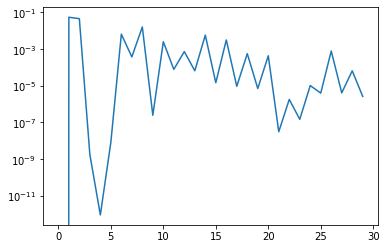

<ipython-input-582-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


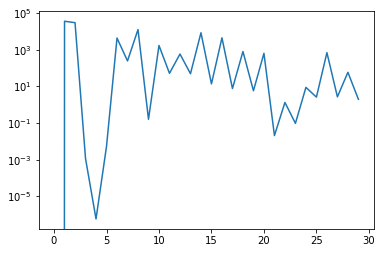

In [582]:
#Perseus

CC_model = W18_SN_total_yield_elements
wind_model = W18_wind_total_yield_elements
#Ia_model = seitenzahl_total_yield_elements #iwamoto_total_yield_elements
Ia_model = shen_total_yield_elements #iwamoto_total_yield_elements
def abundance_func(x,a,b):
    
    sum_model = a*(CC_model + wind_model + b*Ia_model)

    return np.log10(sum_model[x.astype(int)])
x_elements = np.arange(30)
sum_model_test = 10.**(abundance_func(x_elements,1.,.1))
#print(sum_model_test)

#CC_model = iwamoto_total_yield_elements
#sum_model_test = abundance_func(x_elements,1.,0.01)
#print(sum_model_test)

print(W18_wind_total_yield_all)
plt.plot(x_elements,sum_model_test)
plt.yscale('log')
plt.show()

#print(w7_mass)
#print(np.sum(w7_mass[:,2]))

from scipy import optimize
oxygen = np.exp(8.69)
ar = np.exp(6.4)
fe = np.exp(7.5)
#print(oxygen,ar,fe)
y_data = np.log10(np.array([oxygen,ar,fe]))
x_data = np.array([8,18,26])
y_error = np.array([.1,.1,.1])
perseus_elements = np.array([8,18,26])
perseus_abundances = np.array([1.e-1,1.e-3,1.e-2])
perseus_errors = np.array([1.e-4,1.e-4,1.e-4])
p0 = np.array([1.,0.01])
popt,pcov = optimize.curve_fit(abundance_func,x_data,y_data,p0=p0,sigma=y_error,absolute_sigma=True,bounds=[[0.,0.],[1.e12,1.]])
#print(popt,np.sqrt(pcov))
sum_model_test = abundance_func(x_elements,popt[0],popt[1])
#print(10.**(sum_model_test))
plt.plot(x_elements,10.**(sum_model_test))
plt.yscale('log')
plt.show()

#import ufloat
perseusRGS_Fe_ratio_abundance = np.array([1.13, .99, .91])
perseusSXS_Fe_ratio_abundance = np.array([.82, .89, .84, .93, .86, .97, .96]) 
perseusRGS_Fe_ratio_error = np.array([.26,.30,.22])
perseusSXS_Fe_ratio_error = np.array([.11,.09,.08,.09,.12,.20,.09])
perseus_Fe_abundance = 0.81
perseus_Fe_error = 0.01
#perseusRGS_Fe_ratio_percent_diff = np.array([ufloat(.26)])
#print(perseusRGS_Fe_ratio_abundance)
perseusRGS_Fe_ratio_Elements = np.array(['O/Fe', 'Ne/Fe', 'Mg/Fe']) 
perseusSXS_Fe_ratio_Elements= np.array(['Si/Fe', 'S/Fe', 'Ar/Fe', 'Ca/Fe', 'Cr/Fe', 'Mn/Fe', 'Ni/Fe'])
                                       

# Now try fitting with Perseus data
perseus_abundance = np.zeros(11)
perseus_abundance[0:3] = perseusRGS_Fe_ratio_abundance
perseus_abundance[3:9] = perseusSXS_Fe_ratio_abundance[0:6]
perseus_abundance[10] = perseusSXS_Fe_ratio_abundance[6]
perseus_abundance = perseus_abundance + perseus_Fe_abundance
perseus_abundance[9] = perseus_Fe_abundance
perseus_error = np.zeros(11)
perseus_error[0:3] = perseusRGS_Fe_ratio_error
perseus_error[3:9] = perseusSXS_Fe_ratio_error[0:6]
perseus_error[10] = perseusSXS_Fe_ratio_error[6]
perseus_error[9] = perseus_Fe_error
perseus_elements = np.array([8,10,12,14,16,18,20,24,25,26,28])
#print(perseus_abundance)
#print(perseus_error)
#print(perseus_elements)         
                                       
                                       


[0.   0.   0.02 0.05 0.03 0.04 0.04 0.12 0.07 0.06 0.1  0.04 0.06 0.07
 0.01 0.05 0.02 0.06 0.1  0.04 0.02 0.02 0.03 0.03 0.02 0.01 0.08 0.08
 0.04 0.04 0.04 0.02 0.06 0.04 0.03 0.06 0.08 0.03 0.03 0.04 0.04 0.07
 0.06 0.   0.03 0.13 0.04 0.02 0.03 0.03 0.06 0.06 0.03 0.08 0.08 0.02
 0.07 0.02 0.06 0.05 0.02 0.   0.02 0.04 0.06 0.03 0.06 0.03 0.06 0.03
 0.02 0.02 0.02 0.04 0.04 0.04 0.03 0.06 0.03 0.04 0.08 0.03 0.03 0.04
 0.   0.   0.   0.   0.   0.   0.03 0.   0.03 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.   0.   0.02 0.05 0.03 0.04 0.04 0.12 0.07 0.06 0.1  0.04 0.06 0.07
 0.01 0.05 0.02 0.06 0.1  0.04 0.02 0.02 0.03 0.03 0.02 0.01 0.08 0.08
 0.04 0.04 0.04 0.02 0.06 0.04 0.03 0.06 0.08 0.03 0.03 0.04 0.04 0.07
 0.06 0.   0.03 0.13 0.04 0.02 0.03 0.03 0.06 0.06 0.03 0.08 0.08 0.02
 0.07 0.02 0.06 0.05 0.02 0.   0.02 0.04 0.06 0.03 0.06 0.03 0.06 0.03
 0.02 0.02 0.02 0.04 0.04 0.04 0.03 0.0

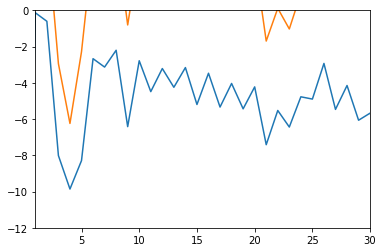

In [583]:
def load_solar_abundances():
    solar_elements_log = np.zeros(120)-20.
    solar_elements_log_error = np.zeros(120)

    solar_elements = np.zeros(120)-20.
    solar_elements_error = np.zeros(120)

    # Asplund 2009 solar abundances
    #solar_data = np.loadtxt("solar_abundances_asplund_2009.txt",usecols=(0,2,3,4,5,6,8,9,10,11))
    #
    #solar_elements_log[np.int_(solar_data[:,0])] = np.where(solar_data[:,1] == -19,solar_data[:,3],solar_data[:,1])
    #solar_elements_log_error[np.int_(solar_data[:,0])] = np.where(solar_data[:,1] == -19,solar_data[:,4],solar_data[:,2])
    #
    #solar_elements_log[np.int_(solar_data[:,5])] = np.where(solar_data[:,6] == -19,solar_data[:,8],solar_data[:,6])
    #solar_elements_log_error[np.int_(solar_data[:,5])] = np.where(solar_data[:,6] == -19,solar_data[:,9],solar_data[:,7])

    
    # Lodders 2009 solar data:    (Lodders, K., Palme, H., Gail, H.-P., 2009, Landolt-Börnstein, New Series, Astronomy and Astrophysics, Springer Verlag, Berlin, 2009)

    # need to rewrite this for Lodders - Brian, 6/3/2020
    
    solar_data = np.loadtxt("solar_abundances_lodders_2009.txt",skiprows=2,usecols=(0,5,6))

    solar_elements_log[np.int_(solar_data[:,0])] = solar_data[:,1]
    solar_elements_log_error[np.int_(solar_data[:,0])] = solar_data[:,2]

    print(solar_elements_log_error)
    
    atomic_data = np.loadtxt("atomic_masses.txt",usecols=(0,3))

    atomic_mass = np.zeros(120)
    atomic_mass[np.int_(atomic_data[:,0])] = atomic_data[:,1]
    atomic_mass[0]=1.


    solar_elements = 10.**solar_elements_log
    total_mass_solar = (np.sum(solar_elements*atomic_mass))

    #print(total_mass_solar)
    #print(np.sum(solar_elements*atomic_mass)/total_mass_solar)
    
    # Need to mulitply by atomic mass here to get the total mass of each element. - Brian, 6/3/2020
    
    solar_elements_normalized_log = np.log10(solar_elements*atomic_mass) - np.log10(total_mass_solar)

    
    # Also need to update the error range?
    
    #solar_elements_error = 10.**solar_elements_log_error
    #
    #solar_elements_normalized_log_error = np.log10(solar_elements_error*atomic_mass) #- np.log10(total_mass_solar)

    solar_elements_normalized_log_error = solar_elements_log_error
    
    return solar_elements_normalized_log,solar_elements_normalized_log_error
# Run this commad to load the solar data:

solar_elements_log,solar_elements_log_error = load_solar_abundances()



print(solar_elements_log_error)

plt.plot(solar_elements_log)
plt.plot(x_elements,sum_model_test)
plt.xlim(1,30)
plt.ylim(-12,0)
plt.show()

In [584]:
dill.dump_session('imf_data_default.db')

In [466]:

#End of Notebook 2



In [467]:
# Now set up for fitting with Perseus data

perseus_abundance = np.zeros(11)
perseus_abundance[0:3] = perseusRGS_Fe_ratio_abundance
perseus_abundance[3:9] = perseusSXS_Fe_ratio_abundance[0:6]
perseus_abundance[10] = perseusSXS_Fe_ratio_abundance[6]

#perseus_abundance = perseus_abundance + perseus_Fe_abundance
#perseus_abundance[9] = perseus_Fe_abundance

perseus_abundance[9] = 1.

perseus_error = np.zeros(11)
perseus_error[0:3] = perseusRGS_Fe_ratio_error
perseus_error[3:9] = perseusSXS_Fe_ratio_error[0:6]
perseus_error[10] = perseusSXS_Fe_ratio_error[6]
perseus_error[9] = perseus_Fe_error

perseus_elements = np.array([8,10,12,14,16,18,20,24,25,26,28])

print(perseus_abundance)
print(perseus_error)

print(perseus_elements)
                                
# Everything is now set relative to solar abundances, in real space.
# Need to convert to actual amounts, in log space:

perseus_abundance_log = solar_elements_log[perseus_elements] + np.log10(perseus_abundance)
perseus_abundance_log = perseus_abundance_log + np.log10(perseus_Fe_abundance)

perseus_error_log = np.log10(1.+perseus_error)


# Print a few values to check everything is okay:

print(10.**solar_elements_log[perseus_elements])
print(10.**perseus_abundance_log)

print(solar_elements_log_error[perseus_elements])
print(perseus_error_log)

#print(10.**(perseus_abundance_log+perseus_error_log)/10.**(perseus_abundance_log)-1.)

# To use for solar fitting, with same elements as perseus:

x_data_solar = perseus_elements

y_data_solar = solar_elements_log[perseus_elements]

y_error_solar = solar_elements_log_error[perseus_elements]

y_Fe_error_solar_old = y_error_solar[9]
y_error_solar[9] = 0.0001

# To use for perseus fitting:

x_data_perseus = perseus_elements

y_data_perseus = perseus_abundance_log

y_error_perseus = perseus_error_log

    

[1.13 0.99 0.91 0.82 0.89 0.84 0.93 0.86 0.97 1.   0.96]
[0.26 0.3  0.22 0.11 0.09 0.08 0.09 0.12 0.2  0.01 0.09]
[ 8 10 12 14 16 18 20 24 25 26 28]
[6.28158080e-03 1.65525495e-03 6.16113720e-04 6.95740707e-04
 3.38788588e-04 9.23549751e-05 5.98264133e-05 1.69799024e-05
 1.27010054e-05 1.17751135e-03 7.12202273e-05]
[5.74953091e-03 1.32734894e-03 4.54137423e-04 4.62110978e-04
 2.44232693e-04 6.28383251e-05 4.50672372e-05 1.18282000e-05
 9.97917991e-06 9.53784196e-04 5.53808488e-05]
[0.07 0.1  0.06 0.01 0.02 0.1  0.02 0.02 0.01 0.08 0.04]
[0.10037055 0.11394335 0.08635983 0.04532298 0.0374265  0.03342376
 0.0374265  0.04921802 0.07918125 0.00432137 0.0374265 ]


[ 8 10 12 14 16 18 20 24 25 26 28]
[-2.20193105 -2.78113511 -3.21033912 -3.15755259 -3.47007123 -4.0345397
 -4.22310703 -4.77006481 -4.8961619  -2.9290349  -4.14739664]
0 0 0
0 0 1
0 0 2
0 0 3
0 1 0
0 1 1
0 1 2
0 1 3
0 2 0
0 2 1
0 2 2
0 2 3
0 3 0
0 3 1
0 3 2
0 3 3
0 4 0
0 4 1
0 4 2
0 4 3
1 0 0
1 0 1
1 0 2
1 0 3
1 1 0
1 1 1
1 1 2
1 1 3
1 2 0
1 2 1
1 2 2
1 2 3
1 3 0
1 3 1
1 3 2
1 3 3
1 4 0
1 4 1
1 4 2
1 4 3
2 0 0
2 0 1
2 0 2
2 0 3
2 1 0
2 1 1
2 1 2
2 1 3
2 2 0
2 2 1
2 2 2
2 2 3
2 3 0
2 3 1
2 3 2
2 3 3
2 4 0
2 4 1
2 4 2
2 4 3
3 0 0
3 0 1
3 0 2
3 0 3
3 1 0
3 1 1
3 1 2
3 1 3
3 2 0
3 2 1
3 2 2
3 2 3
3 3 0
3 3 1
3 3 2
3 3 3
3 4 0
3 4 1
3 4 2
3 4 3
4 0 0
4 0 1
4 0 2
4 0 3
4 1 0
4 1 1
4 1 2
4 1 3
4 2 0
4 2 1
4 2 2
4 2 3
4 3 0
4 3 1
4 3 2
4 3 3
4 4 0
4 4 1
4 4 2
4 4 3
5 0 0
5 0 1
5 0 2
5 0 3
5 1 0
5 1 1
5 1 2
5 1 3
5 2 0
5 2 1
5 2 2
5 2 3
5 3 0
5 3 1
5 3 2
5 3 3
5 4 0
5 4 1
5 4 2
5 4 3
Here [[[7.05078866e-17 1.04377248e-02 1.54794060e-02 8.09196826e-03]
  [7.29376313e-17 1.00850156e-02 1.4813570

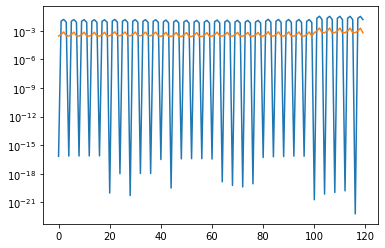

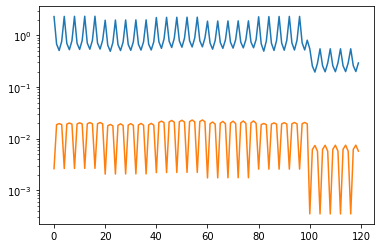

2.2242255813113343 3.189317425970929e-17
1.708297062842444 7.62010384960246e-25
Ia model
[0.00000000e+00 8.76348384e-22 1.33199680e-11 7.09447217e-20
 1.20444348e-30 5.55289584e-13 5.62915556e-04 1.28980572e-07
 2.19173650e-02 1.13964693e-11 5.52592364e-04 2.65127987e-06
 1.13430903e-03 6.61741066e-05 5.01083983e-02 4.46367577e-05
 2.60222460e-02 1.62967603e-05 4.65870658e-03 1.25534030e-05
 3.84331415e-03 4.98014058e-09 1.65149782e-06 1.32446722e-09
 2.29682129e-05 1.02284426e-09 1.95990234e-03 1.18220876e-07
 1.72770928e-04 2.95349700e-06 7.05381796e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

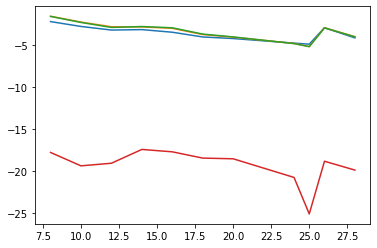

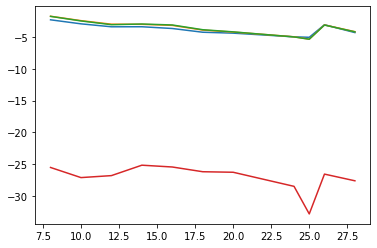

[ 8 10 12 14 16 18 20 24 25 26 28]
[1.22926675e-02 2.48142610e-03 6.85622146e-04 6.55893204e-04
 4.44868243e-04 8.05447113e-05 3.92171333e-05 6.99521453e-06
 2.96345317e-06 5.21337166e-04 4.51550093e-05]
[6.28158080e-03 1.65525495e-03 6.16113720e-04 6.95740707e-04
 3.38788588e-04 9.23549751e-05 5.98264133e-05 1.69799024e-05
 1.27010054e-05 1.17751135e-03 7.12202273e-05]
23.579112199334
5.334624408531148
6.028125581640195


In [553]:
#Fit

heger_energy=9
heger_mixing=0


all_CC_models = np.array([W18_SN_total_yield_elements, W18_SN_total_yield_elements + W18_wind_total_yield_elements, N20_SN_total_yield_elements,N20_SN_total_yield_elements + N20_wind_total_yield_elements,kobayashi_02_total_yield_elements, heger_2010_total_yield_elements[:,heger_energy,heger_mixing]]) #,heger_woosley_total_yield_elements])
#all_wind_models = np.array([W18_wind_total_yield_elements,N20_wind_total_yield_elements])
all_wind_models = np.array([karakas_a2_0200_total_yield_elements,karakas_a3_0080_total_yield_elements,karakas_a4_0040_total_yield_elements,karakas_a5_0001_total_yield_elements,karakas_a5_0001_total_yield_elements*0.])
all_Ia_models = np.array([shen_total_yield_elements,iwamoto_total_yield_elements, wdd2_total_yield_elements, w7_total_yield_elements]) #,sukhbold_total_yield_elements])
all_AGB_models = np.array([])


solar_normalization = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_Ia_ratio = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_pcov_0 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_pcov_1 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])

perseus_normalization = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_Ia_ratio = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_pcov_0 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_pcov_1 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])

print(x_data_solar)
print(y_data_solar)

for CC in np.arange(all_CC_models.shape[0]):
    for wind in np.arange(all_wind_models.shape[0]):
        for Ia in np.arange(all_Ia_models.shape[0]):
            CC_model = all_CC_models[CC]
            wind_model = all_wind_models[wind]
            Ia_model = all_Ia_models[Ia]
            
            print(CC,wind,Ia)
            
            # Fit solar data with this set of models
            try:
                popt,pcov = optimize.curve_fit(abundance_func,x_data_solar,y_data_solar,p0=p0,sigma=y_error_solar,absolute_sigma=True,bounds=[[0.,0.],[1.e12,1.]])
            except RuntimeError:
                print("Error Solar",CC,wind,Ia)
            
            #print(popt,pcov)
            solar_normalization[CC,wind,Ia] = popt[0]
            solar_Ia_ratio[CC,wind,Ia] = popt[1]
            solar_pcov_0[CC,wind,Ia] = pcov[0,0]
            solar_pcov_1[CC,wind,Ia] = pcov[1,1]
            #perseus_pcov_0[CC,wind,Ia] = pcov[0,0]
            #perseus_pcov_1[CC,wind,Ia] = pcov[1,1]

            #print(CC,wind,Ia)
            # Fit preseus data with this set of models

            try:
                popt,pcov = optimize.curve_fit(abundance_func,x_data_perseus,y_data_perseus,p0=p0,sigma=y_error_perseus,absolute_sigma=True,bounds=[[0.,0.],[1.e12,1.]])
            except RuntimeError:
                print("Error Perseus",CC,wind,Ia)
            #print(popt,pcov)
            perseus_normalization[CC,wind,Ia] = popt[0]
            perseus_Ia_ratio[CC,wind,Ia] = popt[1]
            perseus_pcov_0[CC,wind,Ia] = pcov[0,0]
            perseus_pcov_1[CC,wind,Ia] = pcov[1,1]


print('Here',solar_Ia_ratio)
print('Here',perseus_Ia_ratio)

plt.plot(solar_Ia_ratio.flatten())
plt.plot(np.sqrt(solar_pcov_1.flatten()))
plt.yscale('log')
plt.show()

plt.plot(solar_normalization.flatten())
plt.plot(np.sqrt(solar_pcov_0.flatten()))
plt.yscale('log')
plt.show()

i=2
j=0
k=0

CC_model = all_CC_models[i]
wind_model = 0.*all_wind_models[j]
Ia_model = all_Ia_models[k]
            

print(solar_normalization[i,j,k],solar_Ia_ratio[i,j,k])
print(perseus_normalization[i,j,k],perseus_Ia_ratio[i,j,k])

print('Ia model')
print(all_Ia_models[k])

print('CC model')
print(all_CC_models[i])

plt.plot(x_data_solar,y_data_solar)
plt.plot(x_data_solar,abundance_func(x_data_solar,solar_normalization[i,j,k],solar_Ia_ratio[i,j,k]))
plt.plot(x_data_solar,np.log10(solar_normalization[i,j,k]*all_CC_models[k][x_data_solar]))
plt.plot(x_data_solar,np.log10(solar_normalization[i,j,k]*solar_Ia_ratio[i,j,k]*all_Ia_models[k][x_data_solar]))
plt.show()

plt.plot(x_data_perseus,y_data_perseus)
plt.plot(x_data_perseus,abundance_func(x_data_perseus,perseus_normalization[i,j,k],perseus_Ia_ratio[i,j,k]))
plt.plot(x_data_perseus,np.log10(perseus_normalization[i,j,k]*all_CC_models[k][x_data_perseus]))
plt.plot(x_data_perseus,np.log10(perseus_normalization[i,j,k]*perseus_Ia_ratio[i,j,k]*all_Ia_models[k][x_data_perseus]))
plt.show()

print(x_data_solar)
print(CC_model[x_data_solar])
print(10.**y_data_solar)
print(CC_model[8]/CC_model[26])
print(10.**y_data_solar[0]/10.**y_data_solar[9])
print(10.**y_data_perseus[0]/10.**y_data_perseus[9])


(119, 10, 4)
0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
1 3 0
1 3 1
1 3 2
1 3 3
1 3 4
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 1 0
2 1 1
2 1 2
2 1 3
2 1 4
2 2 0
2 2 1
2 2 2
2 2 3
2 2 4
2 3 0
2 3 1
2 3 2
2 3 3
2 3 4
2 4 0
2 4 1
2 4 2
2 4 3
2 4 4
3 0 0
3 0 1
3 0 2
3 0 3
3 0 4
3 1 0
3 1 1
3 1 2
3 1 3
3 1 4
3 2 0
3 2 1
3 2 2
3 2 3
3 2 4
3 3 0
3 3 1
3 3 2
3 3 3
3 3 4
3 4 0
3 4 1
3 4 2
3 4 3
3 4 4
4 0 0
4 0 1
4 0 2
4 0 3
4 0 4
4 1 0
4 1 1
4 1 2
4 1 3
4 1 4
4 2 0
4 2 1
4 2 2
4 2 3
4 2 4
4 3 0
4 3 1
4 3 2
4 3 3
4 3 4
4 4 0
4 4 1
4 4 2
4 4 3
4 4 4
5 0 0
5 0 1
5 0 2
5 0 3
5 0 4
5 1 0
5 1 1
5 1 2
5 1 3
5 1 4
5 2 0
5 2 1
5 2 2
5 2 3
5 2 4
5 3 0
5 3 1
5 3 2
5 3 3
5 3 4
5 4 0
5 4 1
5 4 2
5 4 3
5 4 4
6 0 0
6 0 1
6 0 2
6 0 3
6 0 4
6 1 0
6 1 1
6 1 2
6 1 3
6 1 4
6 2 0
6 2 1
6 2 2
6 2 3
6 2

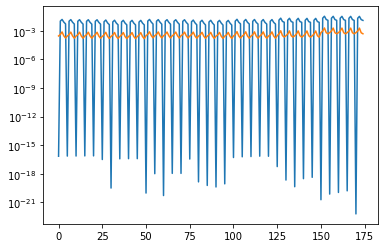

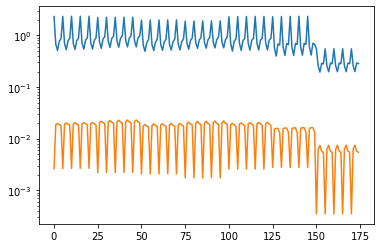

1.9736999259665777 9.685660952465488e-21
1.512388481503222 6.4635657914419196e-18
Ia model
[0.00000000e+00 8.76348384e-22 1.33199680e-11 7.09447217e-20
 1.20444348e-30 5.55289584e-13 5.62915556e-04 1.28980572e-07
 2.19173650e-02 1.13964693e-11 5.52592364e-04 2.65127987e-06
 1.13430903e-03 6.61741066e-05 5.01083983e-02 4.46367577e-05
 2.60222460e-02 1.62967603e-05 4.65870658e-03 1.25534030e-05
 3.84331415e-03 4.98014058e-09 1.65149782e-06 1.32446722e-09
 2.29682129e-05 1.02284426e-09 1.95990234e-03 1.18220876e-07
 1.72770928e-04 2.95349700e-06 7.05381796e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0000000

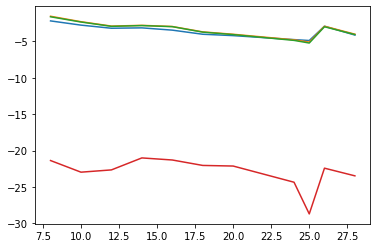

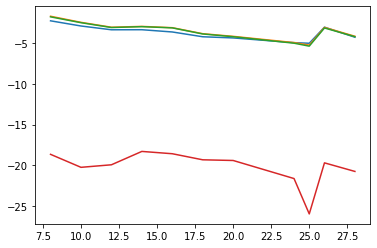

[ 8 10 12 14 16 18 20 24 25 26 28]
[1.38980858e-02 2.46964149e-03 6.17705755e-04 7.81316560e-04
 5.42606347e-04 9.87475390e-05 4.67205888e-05 7.96731641e-06
 3.95881870e-06 5.88516868e-04 4.79223781e-05]
[6.28158080e-03 1.65525495e-03 6.16113720e-04 6.95740707e-04
 3.38788588e-04 9.23549751e-05 5.98264133e-05 1.69799024e-05
 1.27010054e-05 1.17751135e-03 7.12202273e-05]
23.61544178160798
5.334624408531148
6.028125581640195
 
 
Perseus Ia ratios and normalizaton, AGB = karakas_a2_0200 :
1.199504236696798e-25 1.767349772824192  -  W18_SN shen
0.011320055171640662 0.5132546579181053  -  W18_SN iwamoto
0.017646136168561463 0.3706166209592395  -  W18_SN wdd2
0.010249202114188017 0.5270058595359541  -  W18_SN w7
0.0064010026457110986 0.6143637381561939  -  W18_SN Seitenzhal+shen
7.62010384960246e-25 1.708297062842444  -  N20_SN shen
0.009621469821648652 0.5685426430093311  -  N20_SN iwamoto
0.016024411217234965 0.39689114136526027  -  N20_SN wdd2
0.008828026404029996 0.5778871101486737  -  N

In [554]:
#Fit with AGB Models
# CC models without wind
#all_CC_models = np.array([W18_SN_total_yield_elements,N20_SN_total_yield_elements,kobayashi_02_total_yield_elements]) #,heger_woosley_total_yield_elements])

# CC models with and without wind
all_CC_models = np.array([W18_SN_total_yield_elements,N20_SN_total_yield_elements,W18_SN_total_yield_elements+W18_wind_total_yield_elements,N20_SN_total_yield_elements+N20_wind_total_yield_elements,kobayashi_02_total_yield_elements,nomoto_total_yield_elements,heger_2010_total_yield_elements[:,heger_energy,heger_mixing]]) #,heger_woosley_total_yield_elements])
print(heger_2010_total_yield_elements.shape)
#all_wind_models = np.array([W18_wind_total_yield_elements,N20_wind_total_yield_elements])
all_Ia_models = np.array([shen_total_yield_elements,iwamoto_total_yield_elements, wdd2_total_yield_elements, w7_total_yield_elements,seitenzahl_total_yield_elements*.89+shen_total_yield_elements*.11]) #,sukhbold_total_yield_elements])

# include a no AGB model as well
all_wind_models = np.array([karakas_a2_0200_total_yield_elements,karakas_a3_0080_total_yield_elements,karakas_a4_0040_total_yield_elements,karakas_a5_0001_total_yield_elements,karakas_a5_0001_total_yield_elements*0.])


all_CC_names = np.array(['W18_SN','N20_SN','W18_SN+wind','N20_SN+wind','kobayashi_02', 'nomoto','heger_2010']) #,heger_woosley_total_yield_elements])
#all_wind_names = np.array(['W18_wind_total_yield_elements','N20_wind_total_yield_elements'])
all_Ia_names = np.array(['shen','iwamoto','wdd2','w7','Seitenzhal+shen']) #,sukhbold_total_yield_elements])
all_wind_names = np.array(['karakas_a2_0200','karakas_a3_0080','karakas_a4_0040','karakas_a5_0001','No_AGB'])



solar_normalization = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_Ia_ratio = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_pcov_0 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
solar_pcov_1 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])

perseus_normalization = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_Ia_ratio = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_pcov_0 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])
perseus_pcov_1 = np.zeros([all_CC_models.shape[0],all_wind_models.shape[0],all_Ia_models.shape[0]])





p0 = np.array([.1,0.001])


for CC in np.arange(all_CC_models.shape[0]):
    for wind in np.arange(all_wind_models.shape[0]):
        for Ia in np.arange(all_Ia_models.shape[0]):
            CC_model = all_CC_models[CC] 
            wind_model = all_wind_models[wind]
            Ia_model = all_Ia_models[Ia]
            
            # Fit solar data with this set of models
            try:
                popt,pcov = optimize.curve_fit(abundance_func,x_data_solar,y_data_solar,p0=p0,sigma=y_error_solar,absolute_sigma=True,bounds=[[0.,0.],[1.e12,1.]])
            except RuntimeError:
                print("Error Solar",CC,wind,Ia)
            #print(popt,pcov)
            solar_normalization[CC,wind,Ia] = popt[0]
            solar_Ia_ratio[CC,wind,Ia] = popt[1]
            solar_pcov_0[CC,wind,Ia] = pcov[0,0]
            solar_pcov_1[CC,wind,Ia] = pcov[1,1]
            #perseus_pcov_0[CC,wind,Ia] = pcov[0,0]
            #perseus_pcov_1[CC,wind,Ia] = pcov[1,1]

            print(CC,wind,Ia)
            # Fit preseus data with this set of models

            try:
                popt,pcov = optimize.curve_fit(abundance_func,x_data_perseus,y_data_perseus,p0=p0,sigma=y_error_perseus,absolute_sigma=True,bounds=[[0.,0.],[1.e12,1.]])
            except RuntimeError:
                print("Error Perseus",CC,wind,Ia)
            #print(popt,pcov)
            perseus_normalization[CC,wind,Ia] = popt[0]
            perseus_Ia_ratio[CC,wind,Ia] = popt[1]
            perseus_pcov_0[CC,wind,Ia] = pcov[0,0]
            perseus_pcov_1[CC,wind,Ia] = pcov[1,1]


print('Here',solar_Ia_ratio)
print('Here',perseus_Ia_ratio)

plt.plot(solar_Ia_ratio.flatten())
plt.plot(np.sqrt(solar_pcov_1.flatten()))
plt.yscale('log')
plt.show()

plt.plot(solar_normalization.flatten())
plt.plot(np.sqrt(solar_pcov_0.flatten()))
plt.yscale('log')
plt.show()

i=2
j=0
k=0

CC_model = all_CC_models[i]
wind_model = 0.*all_wind_models[j]
Ia_model = all_Ia_models[k]
            

print(solar_normalization[i,j,k],solar_Ia_ratio[i,j,k])
print(perseus_normalization[i,j,k],perseus_Ia_ratio[i,j,k])

print('Ia model')
print(all_Ia_models[k])

print('CC model')
print(all_CC_models[i])

plt.plot(x_data_solar,y_data_solar)
plt.plot(x_data_solar,abundance_func(x_data_solar,solar_normalization[i,j,k],solar_Ia_ratio[i,j,k]))
plt.plot(x_data_solar,np.log10(solar_normalization[i,j,k]*all_CC_models[k][x_data_solar]))
plt.plot(x_data_solar,np.log10(solar_normalization[i,j,k]*solar_Ia_ratio[i,j,k]*all_Ia_models[k][x_data_solar]))
plt.show()

plt.plot(x_data_perseus,y_data_perseus)
plt.plot(x_data_perseus,abundance_func(x_data_perseus,perseus_normalization[i,j,k],perseus_Ia_ratio[i,j,k]))
plt.plot(x_data_perseus,np.log10(perseus_normalization[i,j,k]*all_CC_models[k][x_data_perseus]))
plt.plot(x_data_perseus,np.log10(perseus_normalization[i,j,k]*perseus_Ia_ratio[i,j,k]*all_Ia_models[k][x_data_perseus]))
plt.show()

print(x_data_solar)
print(CC_model[x_data_solar])
print(10.**y_data_solar)
print(CC_model[8]/CC_model[26])
print(10.**y_data_solar[0]/10.**y_data_solar[9])
print(10.**y_data_perseus[0]/10.**y_data_perseus[9])

print(' ')
print(' ')


AGB = 0

print('Perseus Ia ratios and normalizaton, AGB =',all_wind_names[AGB],':')
       


for CC in np.arange(all_CC_models.shape[0]):
    for Ia in np.arange(all_Ia_models.shape[0]):
        print(perseus_Ia_ratio[CC,AGB,Ia],perseus_normalization[CC,AGB,Ia],' - ',all_CC_names[CC],all_Ia_names[Ia])
        
        

print('Max and min Perseus Ia ratio: ',np.max(perseus_Ia_ratio),np.min(perseus_Ia_ratio))
print('Max and min Perseus nomalization: ',np.max(perseus_normalization),np.min(perseus_normalization))


In [555]:
#END OF THE CLEAN CODE 11/6/20

In [556]:
solar_fit_data = np.zeros((all_CC_models.shape[0]*all_wind_models.shape[0]*all_Ia_models.shape[0],10),dtype=object)
i=0
                          
for CC in np.arange(all_CC_models.shape[0]):
    for wind in np.arange(all_wind_models.shape[0]):
        for Ia in np.arange(all_Ia_models.shape[0]):
            CC_model = all_CC_models[CC] 
            wind_model = all_wind_models[wind]
            Ia_model = all_Ia_models[Ia]
            solar_fit_data[i,:]=(all_CC_names[CC],all_wind_names[wind],all_Ia_names[Ia],'{:.3f}'.format(solar_normalization[CC,wind,Ia]),'+/-','{:.3f}'.format(np.sqrt(solar_pcov_0[CC,wind,Ia])),' ','{:.2e}'.format(solar_Ia_ratio[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(solar_pcov_1[CC,wind,Ia])))        
            i=i+1
            #print(all_CC_names[CC],all_wind_names[wind],all_Ia_names[Ia],'{:.2e}'.format(solar_normalization[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(solar_pcov_0[CC,wind,Ia])),' ','{:.2e}'.format(solar_Ia_ratio[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(solar_pcov_1[CC,wind,Ia])))        

print(solar_fit_data)

[['W18_SN' 'karakas_a2_0200' 'shen' ... '7.05e-17' '+/-' '2.86e-04']
 ['W18_SN' 'karakas_a2_0200' 'iwamoto' ... '1.04e-02' '+/-' '4.06e-04']
 ['W18_SN' 'karakas_a2_0200' 'wdd2' ... '1.55e-02' '+/-' '7.60e-04']
 ...
 ['heger_2010' 'No_AGB' 'wdd2' ... '3.24e-02' '+/-' '1.90e-03']
 ['heger_2010' 'No_AGB' 'w7' ... '1.49e-02' '+/-' '6.23e-04']
 ['heger_2010' 'No_AGB' 'Seitenzhal+shen' ... '1.23e-02' '+/-' '4.87e-04']]


In [557]:
import pandas as pd
#file1 = open("test_file.txt","w")

solar_table= (pd.DataFrame(solar_fit_data,columns=['CC Models','AGB Models','IA Models','Solar Normalization','+/-','Solar PCOV0','Solar IA Ratio','+/-','Solar PCOV1','j']))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -5)
np.savetxt("solar_data_table.txt",solar_table.values,fmt="%s")
#file1.write(tables1)
#print(tables1.values)

<ipython-input-557-a36c8ad25212>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -5)


In [558]:
perseus_fit_data = np.zeros((all_CC_models.shape[0]*all_wind_models.shape[0]*all_Ia_models.shape[0],10),dtype=object)
i=0
for CC in np.arange(all_CC_models.shape[0]):
    for wind in np.arange(all_wind_models.shape[0]):
        for Ia in np.arange(all_Ia_models.shape[0]):
            CC_model = all_CC_models[CC] 
            wind_model = all_wind_models[wind]
            Ia_model = all_Ia_models[Ia]
            perseus_fit_data[i,:]=(all_CC_names[CC],all_wind_names[wind],all_Ia_names[Ia],'{:.3f}'.format(perseus_normalization[CC,wind,Ia]),'+/-','{:.3f}'.format(np.sqrt(perseus_pcov_0[CC,wind,Ia])),' ','{:.2e}'.format(perseus_Ia_ratio[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(perseus_pcov_1[CC,wind,Ia])))        
            i=i+1
            #print(all_CC_names[CC],all_wind_names[wind],all_Ia_names[Ia],'{:.2e}'.format(solar_normalization[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(solar_pcov_0[CC,wind,Ia])),' ','{:.2e}'.format(solar_Ia_ratio[CC,wind,Ia]),'+/-','{:.2e}'.format(np.sqrt(solar_pcov_1[CC,wind,Ia])))        

print(perseus_fit_data)

[['W18_SN' 'karakas_a2_0200' 'shen' ... '1.20e-25' '+/-' '7.19e-04']
 ['W18_SN' 'karakas_a2_0200' 'iwamoto' ... '1.13e-02' '+/-' '9.60e-04']
 ['W18_SN' 'karakas_a2_0200' 'wdd2' ... '1.76e-02' '+/-' '1.84e-03']
 ...
 ['heger_2010' 'No_AGB' 'wdd2' ... '1.76e-02' '+/-' '2.76e-03']
 ['heger_2010' 'No_AGB' 'w7' ... '1.20e-02' '+/-' '1.48e-03']
 ['heger_2010' 'No_AGB' 'Seitenzhal+shen' ... '8.45e-03' '+/-' '9.71e-04']]


In [559]:
perseus_table= (pd.DataFrame(perseus_fit_data,columns=['CC Models','AGB Models','IA Models','Solar Normalization','+/-','Solar PCOV0','Solar IA Ratio','+/-','Solar PCOV1','j']))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -5)
np.savetxt("perseus_data_table.txt",perseus_table.values,fmt="%s")
#file1.write(tables1)
#print(tables1.values)

<ipython-input-559-b1a6703a744d>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -5)


In [549]:
num_plot_models=25
NPM=num_plot_models

In [550]:
print(all_CC_names)

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto'
 'heger_2010']


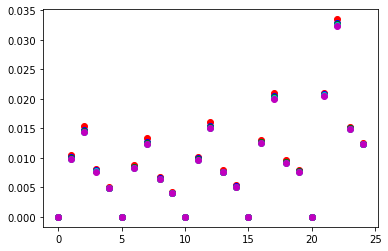

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto'
 'heger_2010']
['karakas_a2_0200' 'karakas_a3_0080' 'karakas_a4_0040' 'karakas_a5_0001'
 'No_AGB']


In [560]:
#SOLAR IA RATIO PLOT

plt.plot(np.reshape(solar_Ia_ratio[2:,0,:],(NPM)),'ro') #Karakas0200 red
plt.plot(np.reshape(solar_Ia_ratio[2:,1,:],(NPM)),'bo') #Karakas0080 blue
plt.plot(np.reshape(solar_Ia_ratio[2:,2,:],(NPM)),'go') #Karakas0040 green
plt.plot(np.reshape(solar_Ia_ratio[2:,3,:],(NPM)),'co') #Karakas0001 cyan 
plt.plot(np.reshape(solar_Ia_ratio[2:,4,:],(NPM)),'mo') #noAGB magenta
#plt.yscale('log')
plt.show()
print(all_CC_names)
print(all_wind_names)


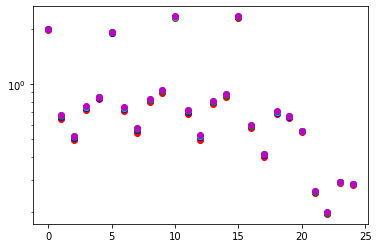

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto'
 'heger_2010']
['karakas_a2_0200' 'karakas_a3_0080' 'karakas_a4_0040' 'karakas_a5_0001'
 'No_AGB']


In [561]:
#SOLAR NORMALIZATION PLOT

plt.plot(np.reshape(solar_normalization[2:,0,:],(NPM)),'ro') #Karakas0200 red
plt.plot(np.reshape(solar_normalization[2:,1,:],(NPM)),'bo') #Karakas0080 blue
plt.plot(np.reshape(solar_normalization[2:,2,:],(NPM)),'go') #Karakas0040 green
plt.plot(np.reshape(solar_normalization[2:,3,:],(NPM)),'co') #Karakas0001 cyan 
plt.plot(np.reshape(solar_normalization[2:,4,:],(NPM)),'mo') #noAGB magenta
plt.yscale('log')
plt.show()
print(all_CC_names)
print(all_wind_names)

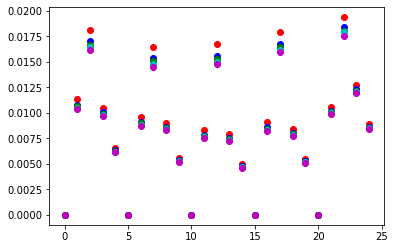

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto'
 'heger_2010']
['karakas_a2_0200' 'karakas_a3_0080' 'karakas_a4_0040' 'karakas_a5_0001'
 'No_AGB']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


In [562]:
#PERSEUS IA RATIO PLOT

plt.plot(np.reshape(perseus_Ia_ratio[2:,0,:],(NPM)),'ro') #Karakas0200 red
plt.plot(np.reshape(perseus_Ia_ratio[2:,1,:],(NPM)),'bo') #Karakas0080 blue
plt.plot(np.reshape(perseus_Ia_ratio[2:,2,:],(NPM)),'go') #Karakas0040 green
plt.plot(np.reshape(perseus_Ia_ratio[2:,3,:],(NPM)),'co') #Karakas0001 cyan 
plt.plot(np.reshape(perseus_Ia_ratio[2:,4,:],(NPM)),'mo') #noAGB magenta
#plt.yscale('log')
plt.show()
print(all_CC_names)
print(all_wind_names)
print(all_Ia_names)

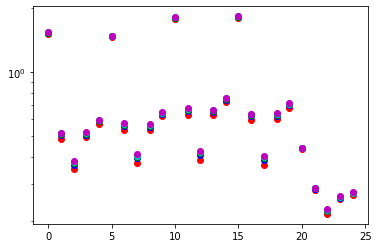

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto'
 'heger_2010']
['karakas_a2_0200' 'karakas_a3_0080' 'karakas_a4_0040' 'karakas_a5_0001'
 'No_AGB']


In [563]:
#PERSEUS NORMALIZATION PLOT

plt.plot(np.reshape(perseus_normalization[2:,0,:],(NPM)),'ro') #Karakas0200 red
plt.plot(np.reshape(perseus_normalization[2:,1,:],(NPM)),'bo') #Karakas0080 blue
plt.plot(np.reshape(perseus_normalization[2:,2,:],(NPM)),'go') #Karakas0040 green
plt.plot(np.reshape(perseus_normalization[2:,3,:],(NPM)),'co') #Karakas0001 cyan 
plt.plot(np.reshape(perseus_normalization[2:,4,:],(NPM)),'mo') #noAGB magenta
plt.yscale('log')
plt.show()
print(all_CC_names)
print(all_wind_names)

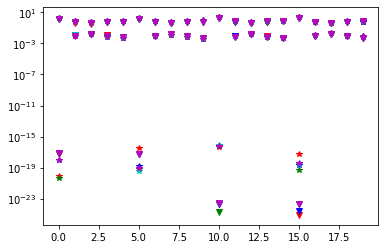

In [485]:
#ALL PLOTS TOGETHER 


#SOLAR STAR
#PERSEUS UPSIDE DOWN TRIANGLE


#SOLAR

#IA RATIO

plt.plot(np.reshape(solar_Ia_ratio[2:,0,:],(NPM)),'r*') #Karakas0200 red
plt.plot(np.reshape(solar_Ia_ratio[2:,1,:],(NPM)),'b*') #Karakas0080 blue
plt.plot(np.reshape(solar_Ia_ratio[2:,2,:],(NPM)),'g*') #Karakas0040 green
plt.plot(np.reshape(solar_Ia_ratio[2:,3,:],(NPM)),'c*') #Karakas0001 cyan 
plt.plot(np.reshape(solar_Ia_ratio[2:,4,:],(NPM)),'m*') #noAGB magenta


#NORMALIZATION

plt.plot(np.reshape(solar_normalization[2:,0,:],(NPM)),'r*') #Karakas0200 red
plt.plot(np.reshape(solar_normalization[2:,1,:],(NPM)),'b*') #Karakas0080 blue
plt.plot(np.reshape(solar_normalization[2:,2,:],(NPM)),'g*') #Karakas0040 green
plt.plot(np.reshape(solar_normalization[2:,3,:],(NPM)),'c*') #Karakas0001 cyan 
plt.plot(np.reshape(solar_normalization[2:,4,:],(NPM)),'m*') #noAGB magenta


#PERSEUS

#IA RATIO

plt.plot(np.reshape(perseus_Ia_ratio[2:,0,:],(NPM)),'rv') #Karakas0200 red
plt.plot(np.reshape(perseus_Ia_ratio[2:,1,:],(NPM)),'bv') #Karakas0080 blue
plt.plot(np.reshape(perseus_Ia_ratio[2:,2,:],(NPM)),'gv') #Karakas0040 green
plt.plot(np.reshape(perseus_Ia_ratio[2:,3,:],(NPM)),'cv') #Karakas0001 cyan 
plt.plot(np.reshape(perseus_Ia_ratio[2:,4,:],(NPM)),'mv') #noAGB magenta



#NORMALIZATION

plt.plot(np.reshape(perseus_normalization[2:,0,:],(NPM)),'rv') #Karakas0200 red
plt.plot(np.reshape(perseus_normalization[2:,1,:],(NPM)),'bv') #Karakas0080 blue
plt.plot(np.reshape(perseus_normalization[2:,2,:],(NPM)),'gv') #Karakas0040 green
plt.plot(np.reshape(perseus_normalization[2:,3,:],(NPM)),'cv') #Karakas0001 cyan 
plt.plot(np.reshape(perseus_normalization[2:,4,:],(NPM)),'mv') #noAGB magenta

plt.yscale('log')
plt.show()


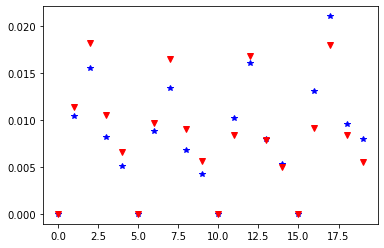

In [487]:
plt.plot(np.reshape(solar_Ia_ratio[2:,0,:],(NPM)),'b*') #Karakas0200 blue
plt.plot(np.reshape(perseus_Ia_ratio[2:,0,:],(NPM)),'rv') #Karakas0200 red
#plt.yscale('log')
plt.show()


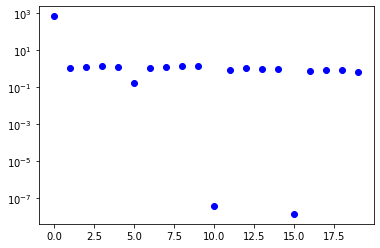

['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']
['karakas_a2_0200' 'karakas_a3_0080' 'karakas_a4_0040' 'karakas_a5_0001'
 'No_AGB']


In [488]:
plt.plot(np.reshape(perseus_Ia_ratio[2:,0,:],(NPM))/(np.reshape(solar_Ia_ratio[2:,0,:],(NPM))),'bo')
plt.yscale('log')
plt.show()

print(all_CC_names)
print(all_Ia_names)
print(all_wind_names)

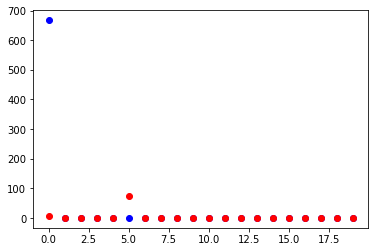

In [489]:
#Perseus vs Solar IA Ratios High Adb 0200
plt.plot(np.reshape(perseus_Ia_ratio[2:,0,:],(NPM))/(np.reshape(solar_Ia_ratio[2:,0,:],(NPM))),'bo')


#Perseus vs Solar IA Ratios Medium Adb 0080
#plt.plot(np.reshape(perseus_Ia_ratio[2:,1,:],(NPM))/(np.reshape(solar_Ia_ratio[2:,1,:],(NPM))),'go')

#Perseus vs Solar IA Ratios No Adb
plt.plot(np.reshape(perseus_Ia_ratio[2:,4,:],(NPM))/(np.reshape(solar_Ia_ratio[2:,4,:],(NPM))),'ro')

 
plt.show()

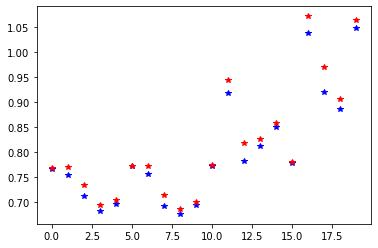

In [490]:
#Perseus vs Solar Normalization High Adb 0200
plt.plot(np.reshape(perseus_normalization[2:,0,:],(NPM))/(np.reshape(solar_normalization[2:,0,:],(NPM))),'b*')


#Perseus vs Solar Normalization Medium Adb 0080
#plt.plot(np.reshape(perseus_normalization[2:,1,:],(NPM))/(np.reshape(solar_normalization[2:,1,:],(NPM))),'g*')

#Perseus vs Solar Normalization No Adb
plt.plot(np.reshape(perseus_normalization[2:,4,:],(NPM))/(np.reshape(solar_normalization[2:,4,:],(NPM))),'r*')

plt.show()

(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind
[['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7']
 ['Kobayashi Shen' 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7']
 ['Nomto Shen' 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']]
['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7' 'Kobayashi Shen'
 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7' 'Nomto Shen'
 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']
['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


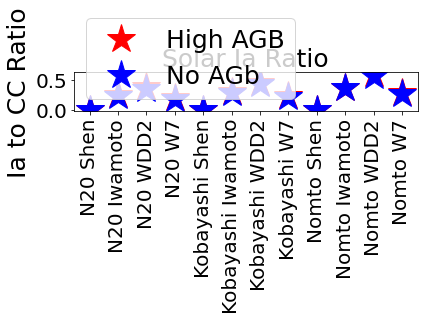

In [491]:
#Possible Figure 1 
NPM=12

#SOLAR

#IA RATIO

names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
        
        
print(names) 
print(names.flatten())

#print(value1)
plt.plot(names.flatten(),np.reshape(solar_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'r*',markersize=30)
plt.plot(names.flatten(),np.reshape(solar_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'b*',markersize=30)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical',fontsize=20)
plt.title("Solar Ia Ratio",fontsize=25)
plt.ylabel("Ia to CC Ratio",fontsize=25)
plt.legend(["High AGB", "No AGb"], fontsize=25)
plt.yticks(fontsize=20)

print(all_CC_names)
print(all_Ia_names)
plt.tight_layout()
plt.savefig('Solar IA Ratio Low High AGB.jpg', dpi = 200)
plt.show()



(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind
[['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7']
 ['Kobayashi Shen' 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7']
 ['Nomto Shen' 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']]
['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7' 'Kobayashi Shen'
 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7' 'Nomto Shen'
 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']
['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


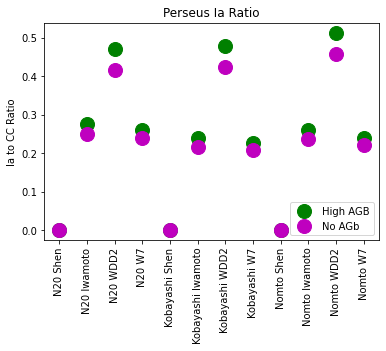

In [492]:
#Possible Figure 2 
NPM=12

#SOLAR

#IA RATIO

#plt.plot(np.reshape(solar_Ia_ratio[3:,0,:-1],(NPM)),'r*') #Karakas0200 red
#plt.plot(np.reshape(solar_Ia_ratio[2:,1,:],(NPM)),'b*') #Karakas0080 blue
#plt.plot(np.reshape(solar_Ia_ratio[2:,2,:],(NPM)),'g*') #Karakas0040 green
#plt.plot(np.reshape(solar_Ia_ratio[2:,3,:],(NPM)),'c*') #Karakas0001 cyan 
#plt.plot(np.reshape(solar_Ia_ratio[3:,4,:-1],(NPM)),'b*') #noAGB magenta
names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
        
        
print(names) 
print(names.flatten())

#print(value1)
plt.plot(names.flatten(),np.reshape(perseus_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'go',markersize=14)
plt.plot(names.flatten(),np.reshape(perseus_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'mo',markersize=14)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical')
plt.title('Perseus Ia Ratio')
plt.legend(["High AGB", "No AGb"])
plt.ylabel("Ia to CC Ratio")
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

print(all_CC_names)
print(all_Ia_names)

plt.savefig('Perseus IA Ratio Low High AGB.png', dpi = 200)
plt.show()



(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind
Perseus High AGB
0.24669349553667505
0.172998744701704
Perseus Low AGB
0.2220945596307131
Solar High AGB
0.25444143798170793
Solar Low AGB
0.24035794514630268


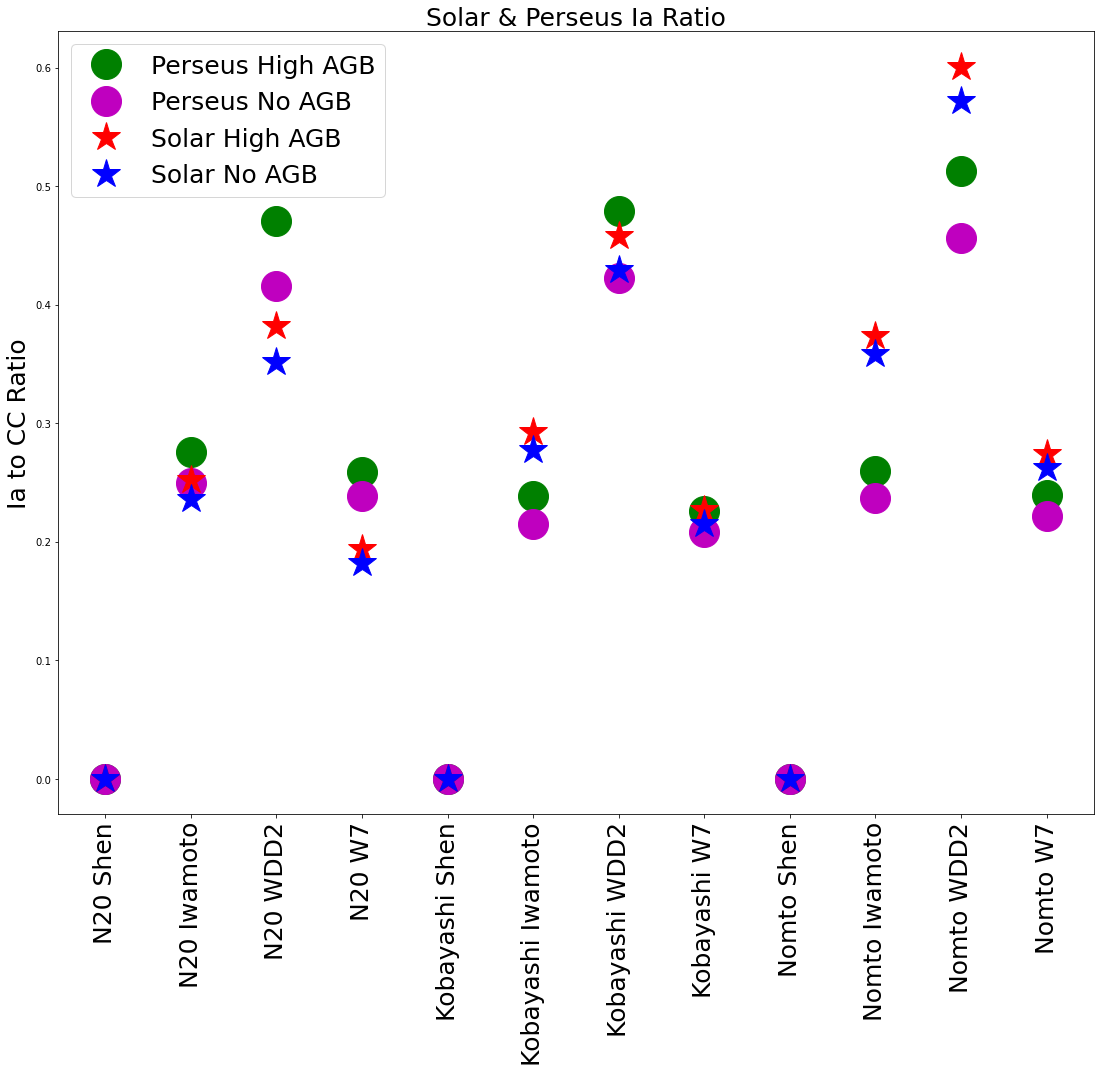

In [493]:
#Possible Figure 3
from pylab import rcParams

names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
# 0 is high AGB, 4 is no AGB
plt.figure(figsize=(15,15))
plt.plot(names.flatten(),np.reshape(perseus_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'go',markersize=30)
plt.plot(names.flatten(),np.reshape(perseus_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'mo',markersize=30)
plt.plot(names.flatten(),np.reshape(solar_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'r*',markersize=30)
plt.plot(names.flatten(),np.reshape(solar_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'b*',markersize=30)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical', fontsize=25)

plt.title('Solar & Perseus Ia Ratio', fontsize=25)
plt.legend(["Perseus High AGB", "Perseus No AGB", "Solar High AGB", "Solar No AGB"], fontsize=25)
print('Perseus High AGB')
print(np.mean(np.reshape(perseus_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num))
print(np.std(np.reshape(perseus_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num))

print("Perseus Low AGB")
print(np.mean(np.reshape(perseus_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num))
print('Solar High AGB')
print(np.mean(np.reshape(solar_Ia_ratio[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num))
print('Solar Low AGB')
print(np.mean(np.reshape(solar_Ia_ratio[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num))
plt.tight_layout()

plt.tight_layout()

plt.ylabel('Ia to CC Ratio', fontsize=25)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical')
plt.savefig('Solar & Perseus IA Ratio Low High AGB.png', dpi = 300, bbox_inches = "tight")

plt.show()

(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind
[['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7']
 ['Kobayashi Shen' 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7']
 ['Nomto Shen' 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']]
['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7' 'Kobayashi Shen'
 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7' 'Nomto Shen'
 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']
['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


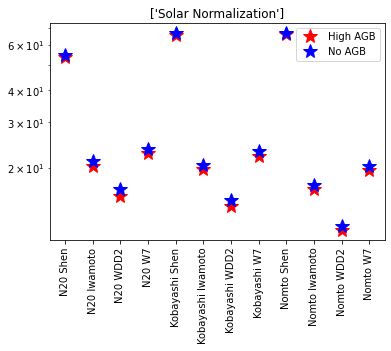

In [494]:
#Possible Figure 4 
NPM=12

#SOLAR

#Normalization


names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
        
        
print(names) 
print(names.flatten())

plt.plot(names.flatten(),np.reshape(solar_normalization[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'r*',markersize=14)
plt.plot(names.flatten(),np.reshape(solar_normalization[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'b*',markersize=14)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical')
plt.yscale('log')
plt.legend(['High AGB', 'No AGB'])
plt.title(['Solar Normalization'])
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

print(all_CC_names)
print(all_Ia_names)

plt.savefig('Solar Normalization Low High AGB.png', dpi = 200)
plt.show()



(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind
[['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7']
 ['Kobayashi Shen' 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7']
 ['Nomto Shen' 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']]
['N20 Shen' 'N20 Iwamoto' 'N20 WDD2' 'N20 W7' 'Kobayashi Shen'
 'Kobayashi Iwamoto' 'Kobayashi WDD2' 'Kobayashi W7' 'Nomto Shen'
 'Nomto Iwamoto' 'Nomto WDD2' 'Nomto W7']
['W18_SN' 'N20_SN' 'W18_SN+wind' 'N20_SN+wind' 'kobayashi_02' 'nomoto']
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


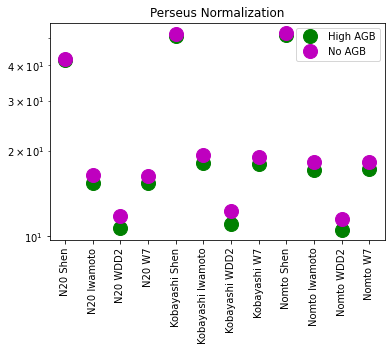

In [495]:
#Possible Figure 4 
NPM=12

#perseus

#Normalization


names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
        
        
print(names) 
print(names.flatten())

plt.plot(names.flatten(),np.reshape(perseus_normalization[3:,0,:-1],(NPM)).flatten()*Ia_num/cc_num,'go',markersize=14)
plt.plot(names.flatten(),np.reshape(perseus_normalization[3:,4,:-1],(NPM)).flatten()*Ia_num/cc_num,'mo',markersize=14)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical')
plt.yscale('log')
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']
plt.legend(["High AGB","No AGB"])
plt.title('Perseus Normalization')
print(all_CC_names)
print(all_Ia_names)

plt.savefig('Perseus Normalization Low High AGB.png', dpi = 200)
plt.show()



(3, 4)
W18_SN
W18_SN
W18_SN
W18_SN
N20_SN
N20_SN
N20_SN
N20_SN
W18_SN+wind
W18_SN+wind
W18_SN+wind
W18_SN+wind


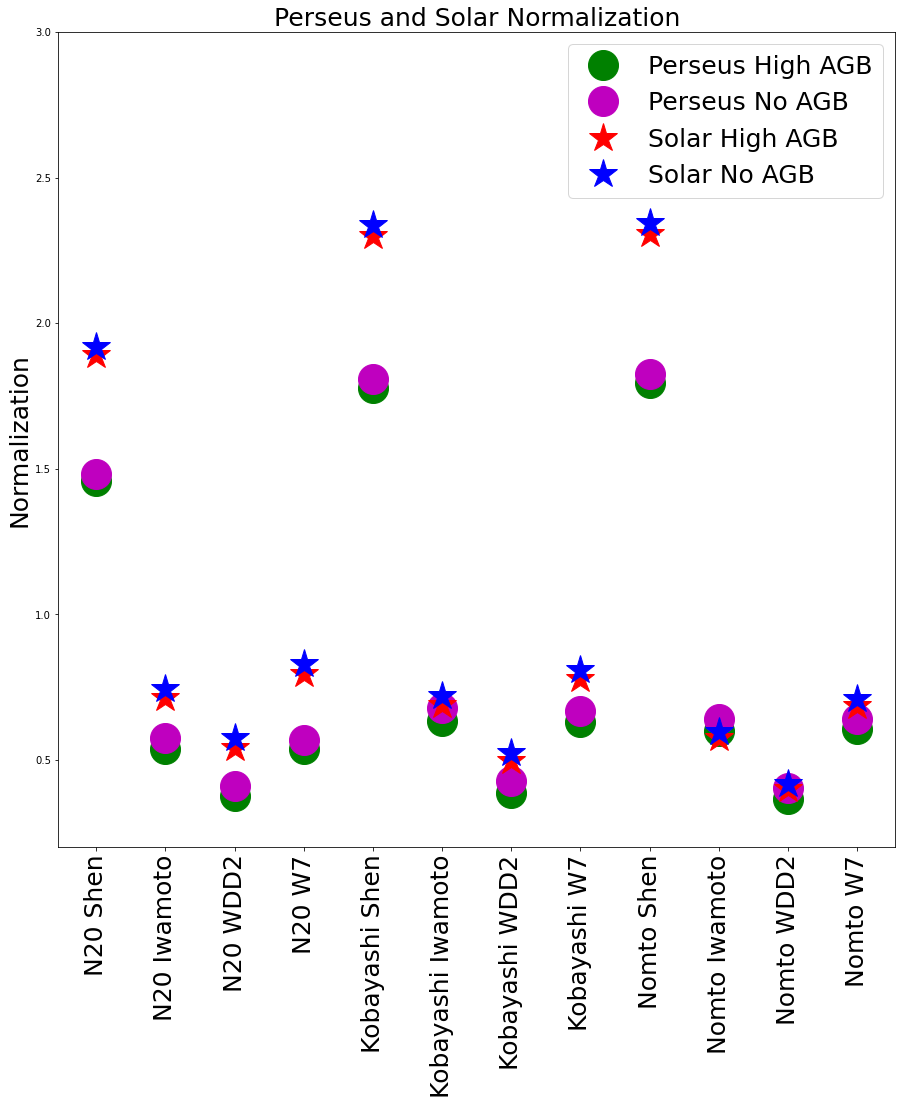

[[1.01308088 1.04708672 1.06519137 1.04190565]
 [1.01594532 1.0434844  1.0548444  1.04056266]
 [1.01599044 1.0357364  1.04378855 1.03485501]]
 
[[1.01446823 1.06938949 1.09918927 1.05777184]
 [1.01767014 1.0735192  1.1057627  1.0600401 ]
 [1.01768009 1.06990366 1.09988209 1.05803005]]


In [496]:
#solar and perseus normalization


names = np.empty((3,4),dtype=object )
print(names.shape)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']

for i in np.arange(0,3):
    for j in np.arange(0,4):
        print(all_CC_names[i])
        names[i,j] = CC_names[i]+' '+IA_names[j]
plt.figure(figsize=(15,15))
plt.plot(names.flatten(),np.reshape(perseus_normalization[3:,0,:-1],(NPM)).flatten(),'go',markersize=30)
plt.plot(names.flatten(),np.reshape(perseus_normalization[3:,4,:-1],(NPM)).flatten(),'mo',markersize=30)
plt.plot(names.flatten(),np.reshape(solar_normalization[3:,0,:-1],(NPM)).flatten(),'r*',markersize=30)
plt.plot(names.flatten(),np.reshape(solar_normalization[3:,4,:-1],(NPM)).flatten(),'b*',markersize=30)
#plt.yscale('log')
plt.ylim(.2,3)
plt.ylabel("Normalization", fontsize=25)
plt.xticks(names.flatten(),names.flatten(),rotation='vertical', fontsize=25)
IA_names=['Shen','Iwamoto','WDD2','W7']
CC_names=['N20','Kobayashi','Nomto']
plt.legend(["Perseus High AGB","Perseus No AGB", 'Solar High AGB', 'Solar No AGB'],fontsize=25)
plt.title('Perseus and Solar Normalization', fontsize=25)

plt.savefig('Perseus Solar Normalization Low High AGB.png', dpi = 200, bbox_inches = "tight")


plt.show()

print(solar_normalization[3:,4,:-1]/solar_normalization[3:,0,:-1])
print(' ')
print(perseus_normalization[3:,4,:-1]/perseus_normalization[3:,0,:-1])

In [44]:

print((perseus_Ia_ratio[4,4,:])*Ia_num/cc_num) #noAGB magenta
print((perseus_Ia_ratio[4,1,:])*Ia_num/cc_num) #noAGB magenta

print(all_Ia_names)

[4.80183118e-01 2.15303258e-01 4.22766869e-01 2.07991378e-01
 1.21721531e-22]
[6.93882640e-01 2.91872709e-01 5.14936406e-01 2.78132584e-01
 2.90590274e-16]
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


In [45]:
print((solar_Ia_ratio[4,4,:])*Ia_num/cc_num) #noAGB magenta
print((solar_Ia_ratio[4,1,:])*Ia_num/cc_num) #noAGB magenta

print(all_Ia_names)

[1.84708271e-01 2.76976993e-01 4.29673319e-01 2.15256539e-01
 2.94617922e-22]
[6.00561138e-01 3.26203747e-01 4.78514627e-01 2.72340485e-01
 6.58308162e-22]
['shen' 'iwamoto' 'wdd2' 'w7' 'Seitenzhal+shen']


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN karakas_a2_0200 wdd2
0.5106091864608874
0.015479405954889964


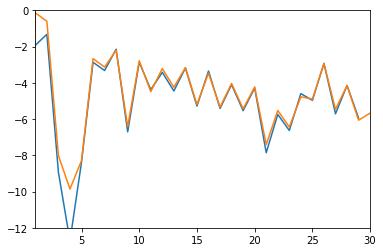

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN karakas_a3_0080 wdd2
0.5293671226364742
0.014813570947176592


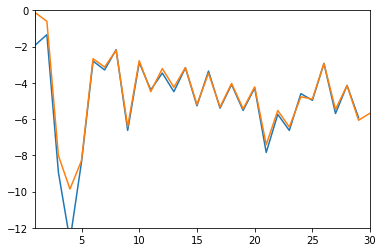

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN karakas_a4_0040 wdd2
0.5356416900887602
0.014604282032264949


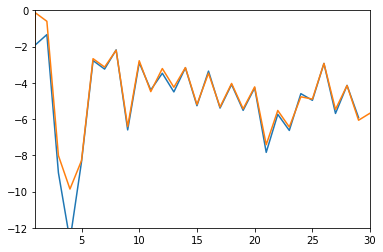

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN karakas_a5_0001 wdd2
0.541285411058709
0.01442290144694956


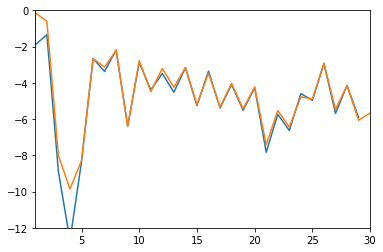

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN No_AGB wdd2
0.5442842862337232
0.014320179558931992


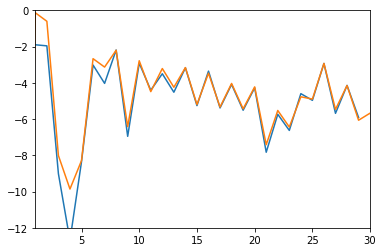

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN karakas_a2_0200 wdd2
0.5625823013633563
0.01346249605993259


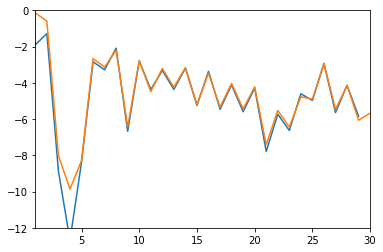

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN karakas_a3_0080 wdd2
0.5843443999724875
0.01282908845276319


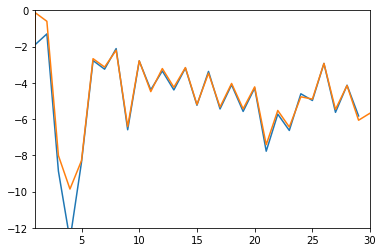

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN karakas_a4_0040 wdd2
0.5916482210309653
0.0126299627230085


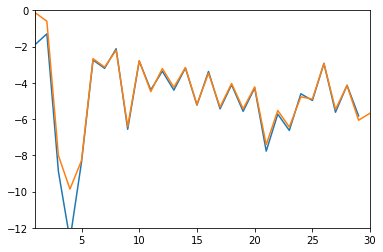

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN karakas_a5_0001 wdd2
0.598298279502913
0.012455466086698796


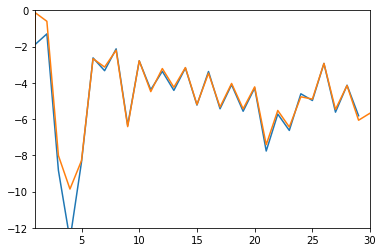

N20_SN No_AGB wdd2
0.6013700650063195
0.012369385574903252


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


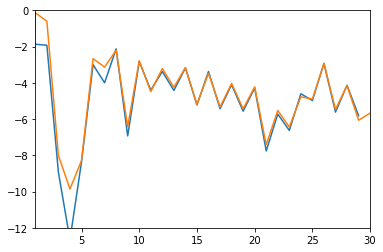

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN+wind karakas_a2_0200 wdd2
0.49232321882475133
0.015455627407918612


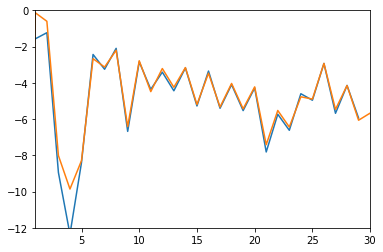

W18_SN+wind karakas_a3_0080 wdd2
0.5094299942357026
0.014801847702999964


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


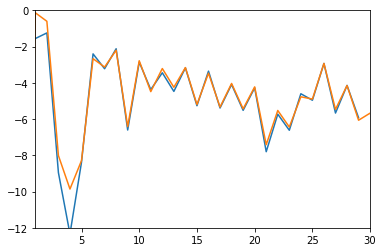

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN+wind karakas_a4_0040 wdd2
0.5151272814281488
0.014596797126567541


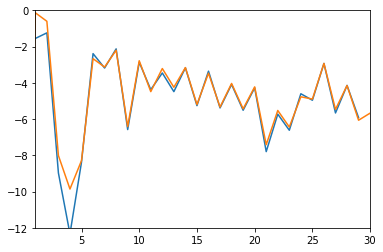

W18_SN+wind karakas_a5_0001 wdd2
0.5202626776047166
0.014418494956509176


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


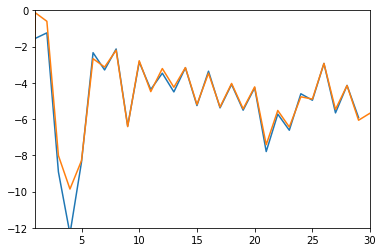

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


W18_SN+wind No_AGB wdd2
0.5229420696943885
0.01431912621472849


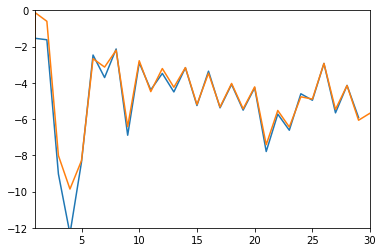

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN+wind karakas_a2_0200 wdd2
0.5415728624356478
0.013360841171181267


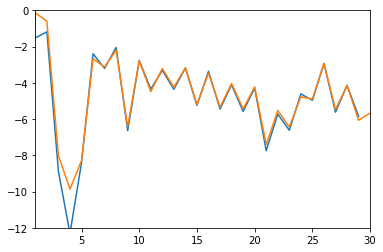

N20_SN+wind karakas_a3_0080 wdd2
0.5614337260986858
0.012736341613771783


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


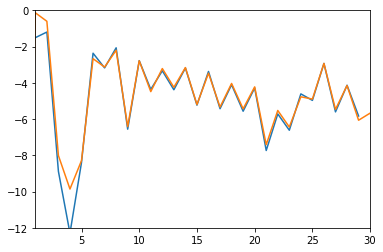

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


N20_SN+wind karakas_a4_0040 wdd2
0.5680719053778442
0.012540383268221189


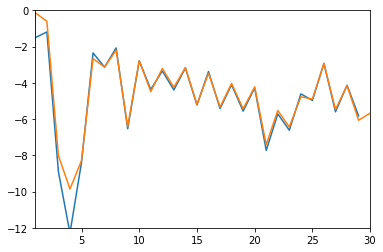

N20_SN+wind karakas_a5_0001 wdd2
0.5741262279043701
0.012368148880284443


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


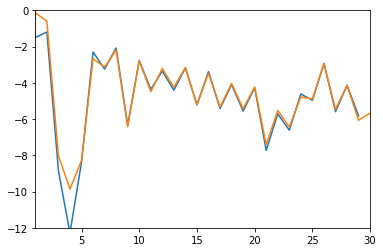

N20_SN+wind No_AGB wdd2
0.5768787380686216
0.012284367887597228


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


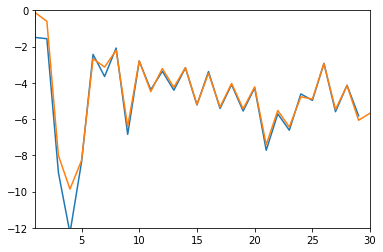

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


kobayashi_02 karakas_a2_0200 wdd2
0.496255079548223
0.016020464628887152


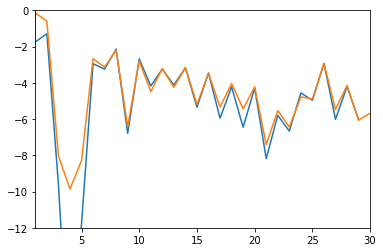

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


kobayashi_02 karakas_a3_0080 wdd2
0.5118049089669875
0.01543749675319556


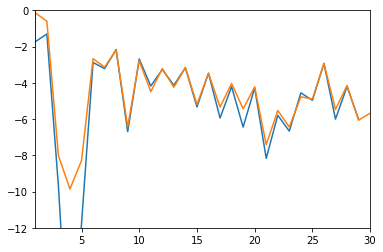

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


kobayashi_02 karakas_a4_0040 wdd2
0.5169085733510027
0.015256971745853262


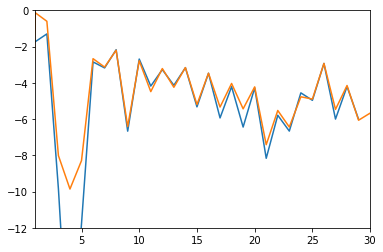

kobayashi_02 karakas_a5_0001 wdd2
0.5214762780870115
0.015101141803920994


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


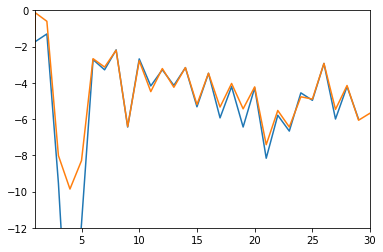

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


kobayashi_02 No_AGB wdd2
0.5234718919073934
0.015027500253277162


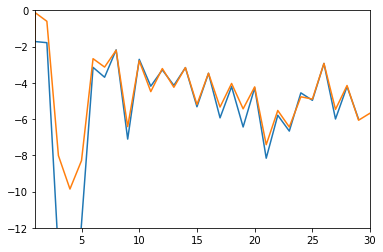

nomoto karakas_a2_0200 wdd2
0.3991245788111393
0.021004623774485878


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


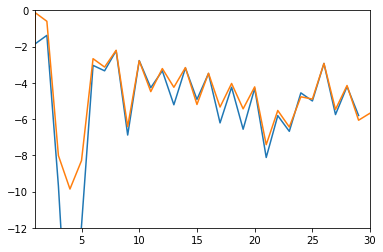

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


nomoto karakas_a3_0080 wdd2
0.40904097665176875
0.020426551590281363


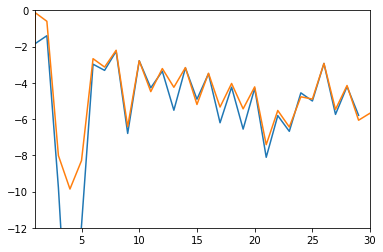

nomoto karakas_a4_0040 wdd2
0.4122975630539602
0.020245837487168038


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


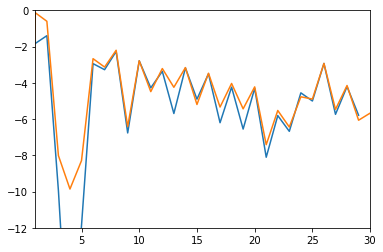

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


nomoto karakas_a5_0001 wdd2
0.4151753553100509
0.02009136054814974


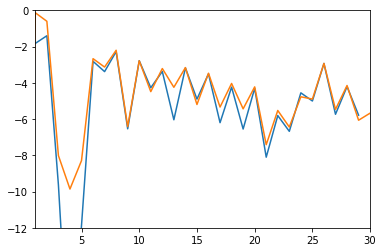

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


nomoto No_AGB wdd2
0.4166016652712271
0.02000823184426562


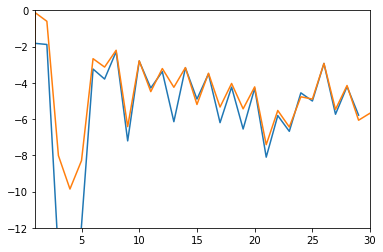

heger_2010 karakas_a2_0200 wdd2
0.19511042709151508
0.03349957684442364


<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


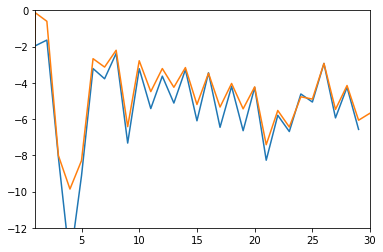

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


heger_2010 karakas_a3_0080 wdd2
0.19764208039083633
0.03287172098227566


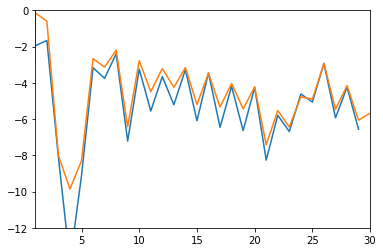

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


heger_2010 karakas_a4_0040 wdd2
0.1984701160717593
0.03267276761176086


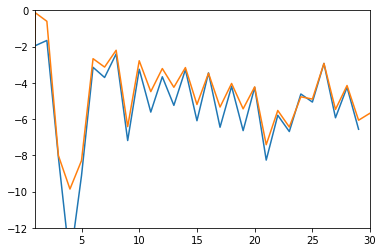

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


heger_2010 karakas_a5_0001 wdd2
0.1991372365614342
0.03251760715422517


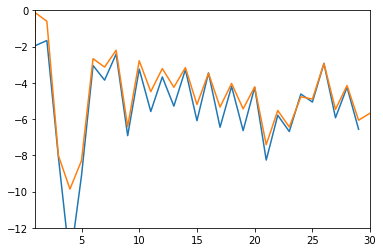

<ipython-input-463-5555ab596e19>:11: RuntimeWarning: divide by zero encountered in log10
  return np.log10(sum_model[x.astype(int)])


heger_2010 No_AGB wdd2
0.1996991377383318
0.03237483462976857


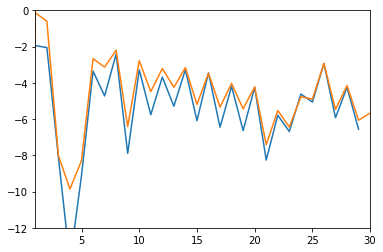

In [565]:
for CC in np.arange(all_CC_models.shape[0]):
    for wind in np.arange(all_wind_models.shape[0]):
        #for Ia in np.arange(all_Ia_models.shape[0]):
        for Ia in np.arange(1)+2:
            CC_model = all_CC_models[CC] 
            wind_model = all_wind_models[wind]
            Ia_model = all_Ia_models[Ia]
            
            x_elements = np.arange(30)
            #sum_model_test = 10.**(abundance_func(x_elements,solar_normalization[CC,wind,Ia],solar_Ia_ratio[CC,wind,Ia]))
            sum_model_test = (abundance_func(x_elements,solar_normalization[CC,wind,Ia],solar_Ia_ratio[CC,wind,Ia]))

            print(all_CC_names[CC],all_wind_names[wind],all_Ia_names[Ia])
            print(solar_normalization[CC,wind,Ia])
            print(solar_Ia_ratio[CC,wind,Ia])
            plt.plot(x_elements,sum_model_test)
        plt.plot(solar_elements_log)
        plt.xlim(1,30)
        plt.ylim(-12,0)
        plt.show()

#print(sum_model_test)
    